# Load libraries

In [1]:
#pragma nodebook off
#Use nodebook for better reproducibility https://github.com/uoa-eResearch/nodebook
%reload_ext nodebook.ipython
%nodebook disk train

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd # Tabular data
import numpy as np # Numerical operations
import geopandas as gpd # Vector geospatial operations
import contextily as ctx # Used for contextual basemaps
import seaborn # Plotting
seaborn.set()
import matplotlib.pyplot as plt # Plotting
import os # File system operations
import zipfile # ZIP file operations
from glob import glob # Recursive file lookup
from unidecode import unidecode # Remove macrons
from tqdm.auto import tqdm # progress bars
tqdm.pandas()
# ML stuff
import sklearn.ensemble
import sklearn.linear_model
from sklearn.multioutput import MultiOutputRegressor
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import statsmodels.api as sm

plt.rcParams['figure.figsize'] = (20, 20) # Large plots by default

In [ ]:
glob("input/**/*", recursive=True)

['input/subnational-population-projections-2018base-2048.xlsx',
 'input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip',
 'input/hospital_discharges',
 'input/total_household_income_2013_2018_census_by_DHB.xlsx',
 'input/statsnzdistrict-health-board-2015-FGDB.zip',
 'input/NZ_Public_Hospitals.geojson',
 'input/hospital_discharges/pubfund2016_17data.zip',
 'input/hospital_discharges/pubfund2015_16data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip',
 'input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip',
 'input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip']

# Load data

In [ ]:
DHB = gpd.read_file("input/statsnzdistrict-health-board-2015-FGDB.zip!district-health-board-2015.gdb")
DHB = DHB[DHB.DHB2015_Name != "Area outside District Health Board"]
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336..."
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921..."
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708..."
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889..."
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819..."
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391..."
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876..."
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412..."


In [ ]:
hosp = gpd.read_file("input/NZ_Public_Hospitals.geojson")
hosp

,Premises_Name,Certification_Service_Type,Service_Types,Total_Beds,Premises_Website,Premises_Address_Other,Premises_Address,Premises_Address_Suburb_Road,Premises_Address_Town_City,Premises_Address_Post_Code,...,Legal_Entity_Address_Suburb_Roa,Legal_Entity_Address_Town_City,Legal_Entity_Address_Post_Code,Legal_Entity_Postal_Address,Legal_Entity_Postal_Address_Sub,Legal_Entity_Postal_Address_Tow,Legal_Entity_Postal_Address_Pos,Legal_Entity_Website,ObjectId,geometry
0,Auckland City Hospital,Public Hospital,"Childrens health, Maternity, Surgical, Medical",1124,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,1,POINT (174.76948 -36.86089)
1,Auckland DHB X 3 Units - Mental Health,Public Hospital,Mental health,96,None,None,2 Park Road,Grafton,Auckland,1023,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,2,POINT (174.76948 -36.86089)
2,Buchanan Rehabilitation Centre,Public Hospital,Mental health,40,None,None,27 Sutherland Road,Point Chevalier,Auckland,1025,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,3,POINT (174.71239 -36.87277)
3,Greenlane Clinical Centre,Public Hospital,"Surgical, Medical",31,None,None,214 Green Lane West,Epsom,Auckland,1051,...,None,Auckland,1051,Private Bag 92024,None,Auckland,1142,http://www.adhb.govt.nz/,4,POINT (174.77965 -36.89332)
4,Opotiki Health Care Centre,Public Hospital,"Maternity, Surgical, Medical",6,None,None,32A King Street,None,Opotiki,3122,...,None,Tauranga,3112,Private Bag 12024,None,Tauranga,3143,None,5,POINT (177.28553 -38.00635)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,Waitakere Hospital,Public Hospital,"Geriatric, Childrens health, Surgical, Mental ...",283,None,None,55 Lincoln Road,Henderson,Auckland,0610,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,79,POINT (174.62866 -36.86952)
79,Wilson Centre,Public Hospital,"Physical, Childrens health",26,None,None,1 St Leonards Road,Hauraki,Auckland,0622,...,None,Auckland,622,PO Box 93503,None,Auckland,740,None,80,POINT (174.78800 -36.79983)
80,Buller Health,Public Hospital,"Maternity, Medical",8,None,None,45 Derby Street,None,Westport,7825,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,81,POINT (171.60491 -41.74922)
81,Grey Base Hospital,Public Hospital,"Dementia care, Geriatric, Mental health, Child...",114,None,None,71 Water Walk Road,None,Greymouth,7805,...,None,Greymouth,7805,PO Box 387,None,Greymouth 7840,7840,None,82,POINT (171.19210 -42.46327)


In [ ]:
TALB = gpd.read_file("input/statsnzterritorial-authority-local-board-2021-clipped-generalised-FGDB.zip!territorial-authority-local-board-2021-clipped-generalised.gdb")
TALB = TALB[TALB.TALB2021_V1_00_NAME_ASCII != "Area Outside Territorial Authority"]
TALB

,TALB2021_V1_00,TALB2021_V1_00_NAME,TALB2021_V1_00_NAME_ASCII,LAND_AREA_SQ_KM,AREA_SQ_KM,Shape_Length,geometry
0,00100,Far North District,Far North District,6686.751655,6699.099475,2.167299e+06,"MULTIPOLYGON (((1643927.274 6083897.824, 16439..."
1,00200,Whangarei District,Whangarei District,2712.118612,2712.118612,9.223848e+05,"MULTIPOLYGON (((1752996.594 6015585.829, 17530..."
2,00300,Kaipara District,Kaipara District,3108.960347,3108.960347,9.341178e+05,"MULTIPOLYGON (((1714357.617 5983211.997, 17143..."
3,01100,Thames-Coromandel District,Thames-Coromandel District,2207.766906,2207.766906,8.204000e+05,"MULTIPOLYGON (((1857357.606 5876615.882, 18573..."
4,01200,Hauraki District,Hauraki District,1270.133527,1270.133527,3.112825e+05,"MULTIPOLYGON (((1824948.875 5883405.558, 18249..."
...,...,...,...,...,...,...,...
82,07617,Māngere-Ōtāhuhu Local Board Area,Mangere-Otahuhu Local Board Area,52.478523,52.478523,1.097939e+05,"MULTIPOLYGON (((1758426.203 5908461.836, 17584..."
83,07618,Ōtara-Papatoetoe Local Board Area,Otara-Papatoetoe Local Board Area,37.110464,37.110464,6.770070e+04,"MULTIPOLYGON (((1765765.640 5909501.655, 17657..."
84,07619,Manurewa Local Board Area,Manurewa Local Board Area,37.110528,37.110528,4.641286e+04,"MULTIPOLYGON (((1769432.488 5904664.673, 17694..."
85,07620,Papakura Local Board Area,Papakura Local Board Area,40.216977,40.216977,6.140098e+04,"MULTIPOLYGON (((1772419.010 5901843.751, 17725..."


In [ ]:
# From https://www.stats.govt.nz/information-releases/subnational-population-projections-2018base2048#map
pop = pd.concat(pd.read_excel(
    "input/subnational-population-projections-2018base-2048.xlsx",
    sheet_name=["Table 5", "Table 6"],
    skiprows=5,
    usecols="A:G,L",
    names=["area", "year", "0-14", "15-39", "40-64", "65+", "total", "median age"],
    engine='openpyxl'
))
# Drop notes
pop.dropna(subset=["year"], inplace=True)
# Fill area forward
pop.area.fillna(method="ffill", inplace=True)
pop.reset_index(inplace=True)
pop.area.replace("Maungakiekie-Tamaki local board area", "Maungakiekie-Tāmaki local board area", inplace=True)
pop.area.replace("Great Barrier local board area", "Aotea/Great Barrier local board area", inplace=True)
# Fix up dtypes
cols = ["0-14", "15-39", "40-64", "65+", "total"]
pop[cols] = pop[cols].astype(int)
pop.year = pop.year.astype(int).astype(str)
pop

,level_0,level_1,area,year,0-14,15-39,40-64,65+,total,median age
0,Table 5,0,Far North district,1996,15200,17700,15600,6100,54500,33.4
1,Table 5,1,Far North district,2001,14900,16400,18100,7000,56400,36.3
2,Table 5,2,Far North district,2006,13800,15700,20000,7900,57500,39.0
3,Table 5,3,Far North district,2013,13800,15100,21300,10500,60600,42.0
4,Table 5,4,Far North district,2018,14500,17600,22800,13000,67900,42.8
...,...,...,...,...,...,...,...,...,...,...
963,Table 6,226,Franklin local board area,2028,17800,30000,30600,18500,96900,40.5
964,Table 6,227,Franklin local board area,2033,19700,33400,33800,22500,109400,41.0
965,Table 6,228,Franklin local board area,2038,22100,36100,37500,26300,122000,41.6
966,Table 6,229,Franklin local board area,2043,24300,38500,42600,29100,134500,42.2


In [ ]:
popyears = pop.year.unique()
popyears

array(['1996', '2001', '2006', '2013', '2018', '2023', '2028', '2033',
       '2038', '2043', '2048'], dtype=object)

<AxesSubplot:xlabel='year'>

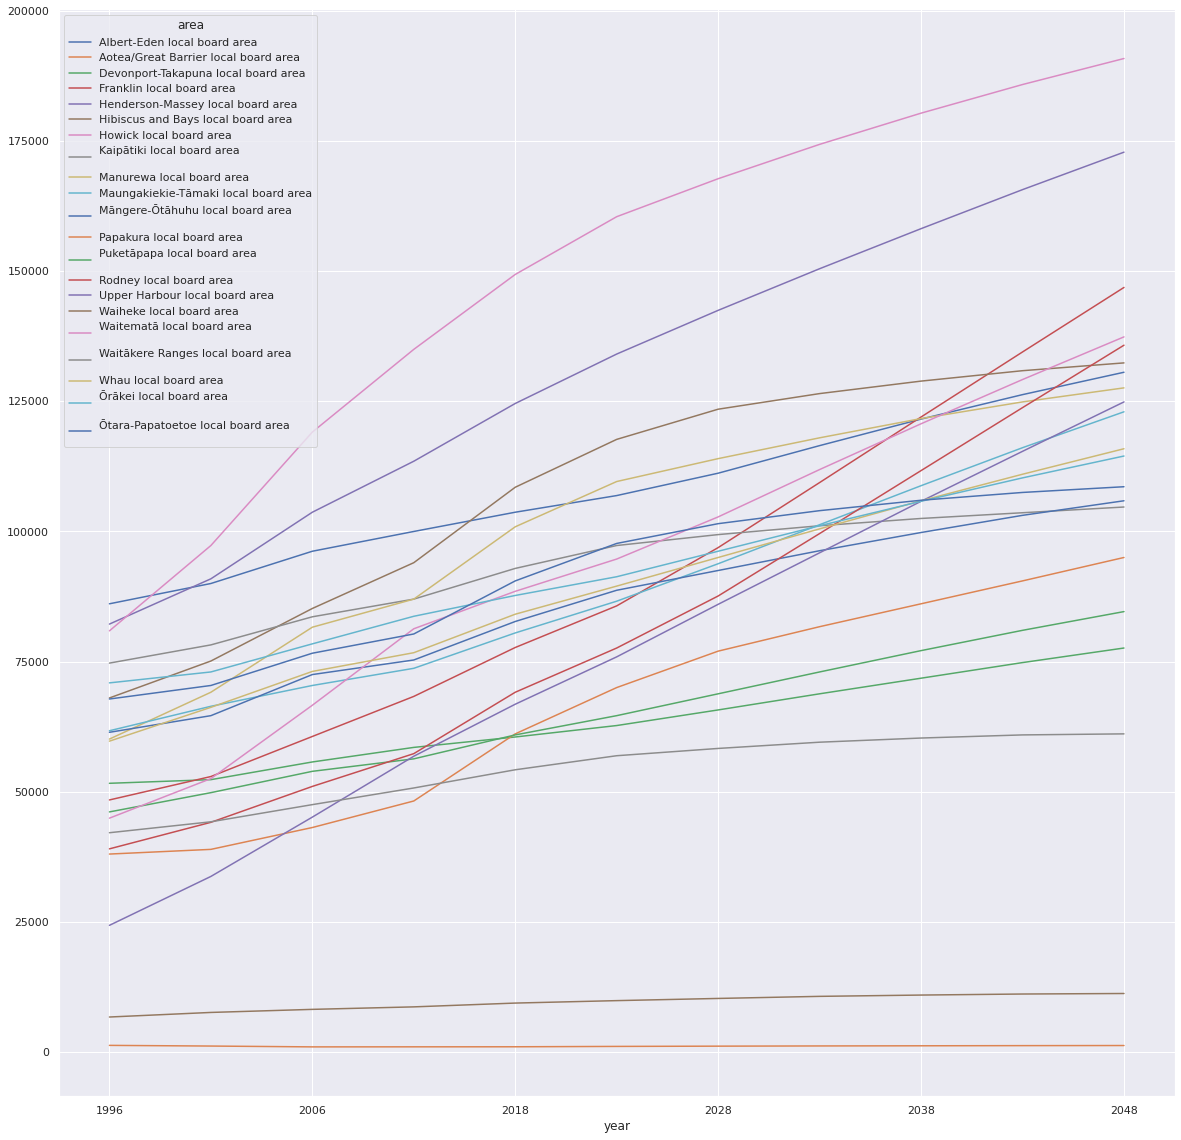

In [ ]:
pop[pop.area.str.contains("local")].pivot(index='year', columns='area', values='total').plot()

In [ ]:
# Restructure population data so we have one row per area, and all population projections in columns
rows = []
for area in pop.area.unique():
    row = {"area": area}
    for year in pop.year.unique():
        for c in ["0-14", "15-39", "40-64", "65+", "total", "median age"]:
            new_col = f"pop_{year}_{c}"
            value = pop.loc[(pop.year == year) & (pop.area == area), c].iloc[0]
            row[new_col] = value
    rows.append(row)
pop = pd.DataFrame(rows)
pop

,area,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,pop_1996_median age,pop_2001_0-14,pop_2001_15-39,pop_2001_40-64,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,Far North district,15200,17700,15600,6100,54500,33.4,14900,16400,18100,...,23700,23500,80600,48.1,14100,19400,24400,23800,81700,48.5
1,Whangārei district\n,17300,23300,19100,8700,68400,33.9,17000,21600,21700,...,34400,31700,116400,46.1,20100,30800,35800,32600,119300,46.3
2,Kaipara district,4700,5700,5200,2200,17800,34.4,4450,5150,6000,...,8200,10500,29800,52.9,4900,6500,8200,10700,30300,53.4
3,Auckland,255600,451400,296500,112300,1115800,32.1,277800,469900,351000,...,717000,402500,2207800,40.5,353000,754000,761900,434000,2302900,41.3
4,Thames-Coromandel district,5200,7100,8200,4800,25400,41.0,5000,6400,9100,...,9400,14300,33300,59.9,3800,5400,9400,14200,32800,60.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,Māngere-Ōtāhuhu local board area\n,18500,25300,13600,4000,61400,26.7,20000,25200,15100,...,31400,16100,103100,37.1,20400,35200,33100,17300,105900,38.3
84,Ōtara-Papatoetoe local board area\n,19200,27900,15200,5500,67800,27.6,20500,27300,16900,...,35800,14800,107500,37.9,18800,37000,37000,15900,108600,39.1
85,Manurewa local board area,17700,25400,13200,3800,60100,27.7,20200,27300,16900,...,38700,19200,124900,37.4,24300,42300,40400,20500,127600,38.5
86,Papakura local board area,9700,15100,9700,3500,38000,30.3,10000,14400,10800,...,28700,14300,90500,38.0,18200,31400,29600,15800,95000,38.4


In [ ]:
cols = pop.columns[pop.columns!="area"].tolist()
cols

['pop_1996_0-14',
 'pop_1996_15-39',
 'pop_1996_40-64',
 'pop_1996_65+',
 'pop_1996_total',
 'pop_1996_median age',
 'pop_2001_0-14',
 'pop_2001_15-39',
 'pop_2001_40-64',
 'pop_2001_65+',
 'pop_2001_total',
 'pop_2001_median age',
 'pop_2006_0-14',
 'pop_2006_15-39',
 'pop_2006_40-64',
 'pop_2006_65+',
 'pop_2006_total',
 'pop_2006_median age',
 'pop_2013_0-14',
 'pop_2013_15-39',
 'pop_2013_40-64',
 'pop_2013_65+',
 'pop_2013_total',
 'pop_2013_median age',
 'pop_2018_0-14',
 'pop_2018_15-39',
 'pop_2018_40-64',
 'pop_2018_65+',
 'pop_2018_total',
 'pop_2018_median age',
 'pop_2023_0-14',
 'pop_2023_15-39',
 'pop_2023_40-64',
 'pop_2023_65+',
 'pop_2023_total',
 'pop_2023_median age',
 'pop_2028_0-14',
 'pop_2028_15-39',
 'pop_2028_40-64',
 'pop_2028_65+',
 'pop_2028_total',
 'pop_2028_median age',
 'pop_2033_0-14',
 'pop_2033_15-39',
 'pop_2033_40-64',
 'pop_2033_65+',
 'pop_2033_total',
 'pop_2033_median age',
 'pop_2038_0-14',
 'pop_2038_15-39',
 'pop_2038_40-64',
 'pop_2038_65+',

In [ ]:
pop.area.tolist()

['Far North district',
 'Whangārei district\n',
 'Kaipara district',
 'Auckland',
 'Thames-Coromandel district',
 'Hauraki district',
 'Waikato district',
 'Matamata-Piako district',
 'Hamilton city',
 'Waipa district',
 'Ōtorohanga district\n',
 'South Waikato district',
 'Waitomo district',
 'Taupō district\n',
 'Western Bay of Plenty district',
 'Tauranga city',
 'Rotorua district',
 'Whakatāne district\n',
 'Kawerau district',
 'Ōpōtiki district\n',
 'Gisborne district',
 'Wairoa district',
 'Hastings district',
 'Napier city',
 "Central Hawke's Bay district",
 'New Plymouth district',
 'Stratford district',
 'South Taranaki district',
 'Ruapehu district',
 'Whanganui district',
 'Rangitikei district',
 'Manawatū district\n',
 'Palmerston North city',
 'Tararua district',
 'Horowhenua district',
 'Kapiti Coast district',
 'Porirua city',
 'Upper Hutt city',
 'Lower Hutt city',
 'Wellington city',
 'Masterton district',
 'Carterton district',
 'South Wairarapa district',
 'Tasman di

In [ ]:
def normalise(string):
    return unidecode(string.lower().strip())
# Augment TALB geodataframe with population information
TALB = pd.merge(TALB,
               pop,
               left_on=TALB.TALB2021_V1_00_NAME.apply(normalise),
               right_on=pop.area.map(normalise),
               how="left")
TALB[["TALB2021_V1_00_NAME"] + cols]

,TALB2021_V1_00_NAME,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,pop_1996_median age,pop_2001_0-14,pop_2001_15-39,pop_2001_40-64,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,Far North District,15200,17700,15600,6100,54500,33.4,14900,16400,18100,...,23700,23500,80600,48.1,14100,19400,24400,23800,81700,48.5
1,Whangarei District,17300,23300,19100,8700,68400,33.9,17000,21600,21700,...,34400,31700,116400,46.1,20100,30800,35800,32600,119300,46.3
2,Kaipara District,4700,5700,5200,2200,17800,34.4,4450,5150,6000,...,8200,10500,29800,52.9,4900,6500,8200,10700,30300,53.4
3,Thames-Coromandel District,5200,7100,8200,4800,25400,41.0,5000,6400,9100,...,9400,14300,33300,59.9,3800,5400,9400,14200,32800,60.3
4,Hauraki District,5000,6250,5100,2250,18550,33.5,4550,5150,5700,...,6200,8200,22100,54.6,3200,4300,6100,8200,21800,55.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Māngere-Ōtāhuhu Local Board Area,18500,25300,13600,4000,61400,26.7,20000,25200,15100,...,31400,16100,103100,37.1,20400,35200,33100,17300,105900,38.3
83,Ōtara-Papatoetoe Local Board Area,19200,27900,15200,5500,67800,27.6,20500,27300,16900,...,35800,14800,107500,37.9,18800,37000,37000,15900,108600,39.1
84,Manurewa Local Board Area,17700,25400,13200,3800,60100,27.7,20200,27300,16900,...,38700,19200,124900,37.4,24300,42300,40400,20500,127600,38.5
85,Papakura Local Board Area,9700,15100,9700,3500,38000,30.3,10000,14400,10800,...,28700,14300,90500,38.0,18200,31400,29600,15800,95000,38.4


In [ ]:
assert all(~TALB.isna())

<AxesSubplot:>

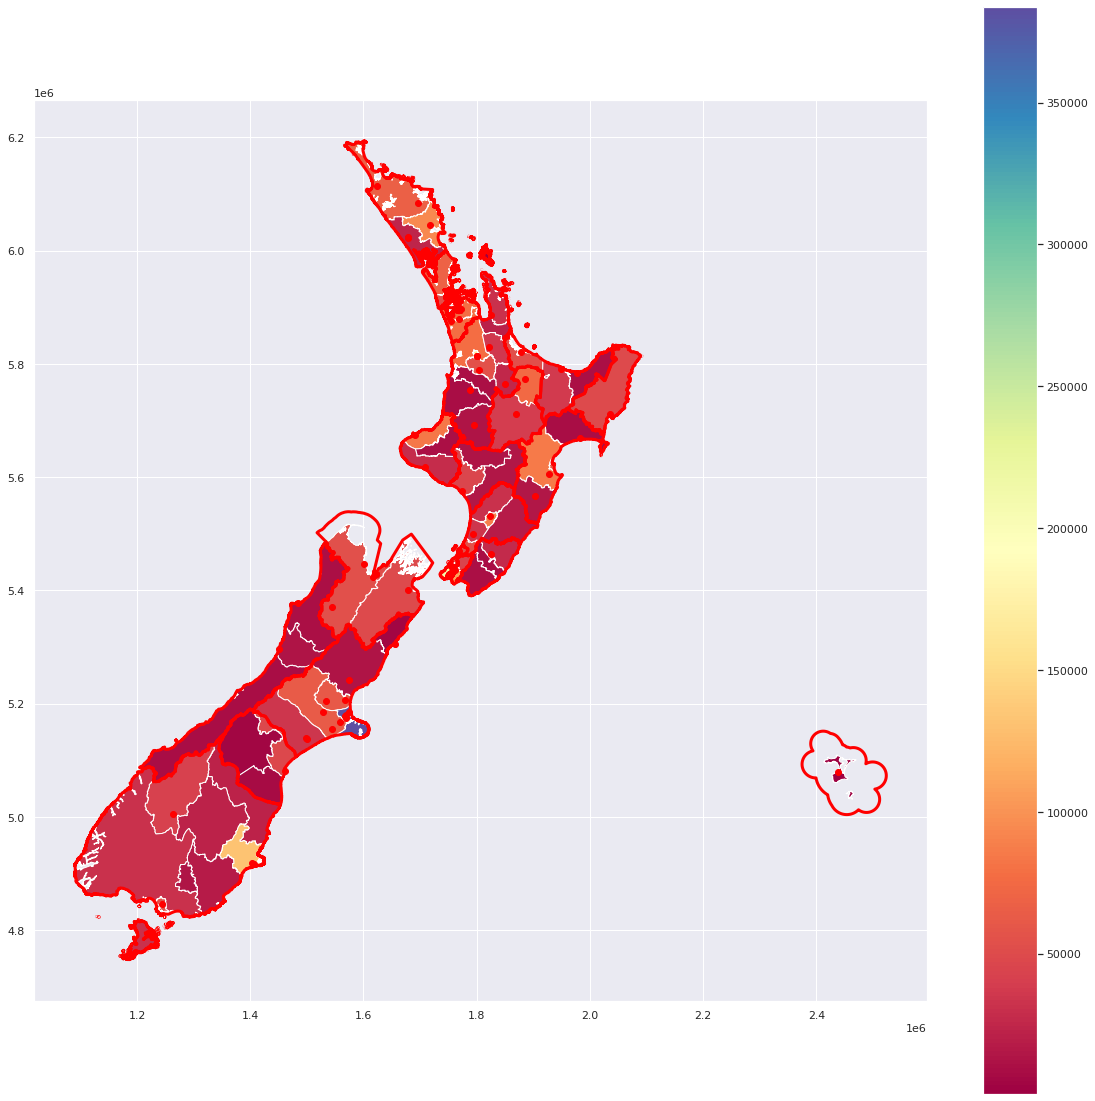

In [ ]:
ax = TALB.plot(column="pop_2018_total", cmap="Spectral", legend=True)
DHB.boundary.plot(ax=ax, color="red", linewidth=3)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")

[1704081.5934     5838535.95349979 1806275.24620008 6001802.16870022]


(5838535.953499794, 6001802.168700218)

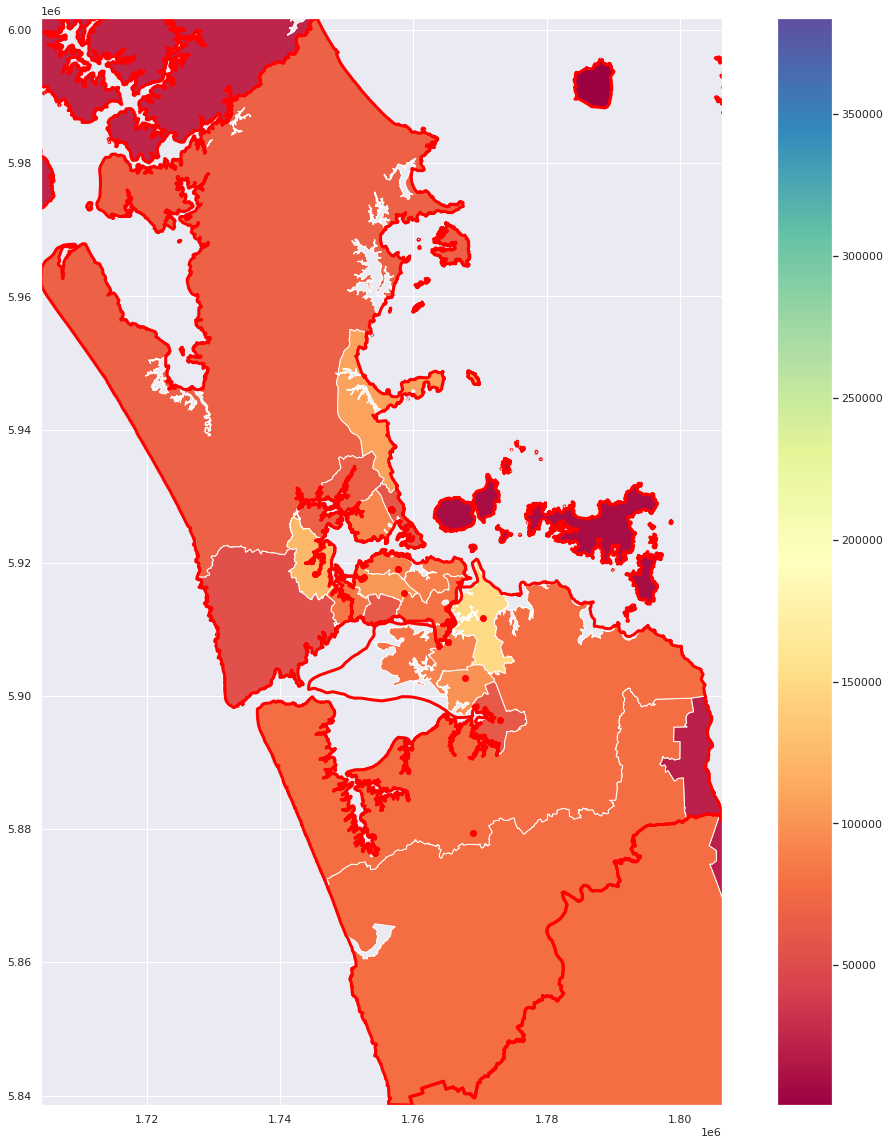

In [ ]:
AKL_bounds = DHB[DHB.DHB2015_Name.isin(["Counties Manukau", "Waitemata"])].total_bounds
print(AKL_bounds)
ax = TALB.plot(column="pop_2018_total", cmap="Spectral", legend=True)
DHB.boundary.plot(ax=ax, color="red", linewidth=3)
hosp.to_crs(DHB.crs).plot(ax=ax, color="red")
ax.set_xlim(AKL_bounds[0], AKL_bounds[2])
ax.set_ylim(AKL_bounds[1], AKL_bounds[3])

In [ ]:
DHB["TALBs"] = DHB.geometry.progress_apply(
    lambda poly: ",".join(
        TALB.TALB2021_V1_00_NAME[TALB.representative_point().intersects(poly)]
    )
)
with pd.option_context('display.max_colwidth', None):
    display(DHB[["DHB2015_Name", "TALBs"]])

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Name,TALBs
0,Northland,"Far North District,Whangarei District,Kaipara District"
1,Waitemata,"Rodney Local Board Area,Hibiscus and Bays Local Board Area,Upper Harbour Local Board Area,Kaipātiki Local Board Area,Devonport-Takapuna Local Board Area,Henderson-Massey Local Board Area,Waitākere Ranges Local Board Area"
2,Auckland,"Aotea/Great Barrier Local Board Area,Waiheke Local Board Area,Waitematā Local Board Area,Whau Local Board Area,Albert-Eden Local Board Area,Puketāpapa Local Board Area,Ōrākei Local Board Area,Maungakiekie-Tāmaki Local Board Area"
3,Counties Manukau,"Howick Local Board Area,Māngere-Ōtāhuhu Local Board Area,Ōtara-Papatoetoe Local Board Area,Manurewa Local Board Area,Papakura Local Board Area,Franklin Local Board Area"
4,Waikato,"Thames-Coromandel District,Hauraki District,Waikato District,Matamata-Piako District,Hamilton City,Waipa District,Ōtorohanga District,South Waikato District,Waitomo District,Ruapehu District"
5,Lakes,"Taupo District,Rotorua District"
6,Bay of Plenty,"Western Bay of Plenty District,Tauranga City,Whakatane District,Kawerau District,Ōpōtiki District"
7,Tairawhiti,Gisborne District
8,Taranaki,"New Plymouth District,Stratford District,South Taranaki District"
9,Hawke's Bay,"Wairoa District,Hastings District,Napier City,Central Hawke's Bay District"


In [ ]:
def get_DHB_pop(poly):
    return TALB.loc[TALB.representative_point().intersects(poly), cols].sum()
result = DHB.geometry.progress_apply(get_DHB_pop)
DHB = pd.concat([DHB, result], axis='columns')
DHB

  0%|          | 0/20 [00:00<?, ?it/s]

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,pop_2043_40-64,pop_2043_65+,pop_2043_total,pop_2043_median age,pop_2048_0-14,pop_2048_15-39,pop_2048_40-64,pop_2048_65+,pop_2048_total,pop_2048_median age
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,66300.0,65700.0,226800.0,147.1,39100.0,56700.0,68400.0,67100.0,231300.0,148.2
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,252500.0,155400.0,775100.0,294.3,127800.0,249200.0,264300.0,168200.0,809400.0,298.4
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,226460.0,112450.0,686180.0,347.7,89660.0,260580.0,248410.0,119650.0,718400.0,355.6
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,237900.0,134800.0,746400.0,236.3,135700.0,244100.0,249000.0,146200.0,774900.0,241.4
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,167850.0,132190.0,562780.0,468.9,97040.0,169260.0,174120.0,138900.0,579220.0,477.0
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,38200.0,31900.0,127800.0,90.6,21600.0,35300.0,39000.0,32600.0,128600.0,91.9
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,94260.0,88820.0,315410.0,239.9,50930.0,82910.0,96950.0,92840.0,323630.0,244.8
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,16500.0,13100.0,55000.0,43.4,10400.0,14500.0,16900.0,13400.0,55200.0,44.1
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,40450.0,36250.0,137150.0,134.6,23450.0,37050.0,40800.0,37250.0,138400.0,135.2
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,59730.0,53950.0,199530.0,187.4,33670.0,51940.0,61190.0,55310.0,201960.0,190.1


Text(0.5, 1.0, 'Population by DHB in 2018')

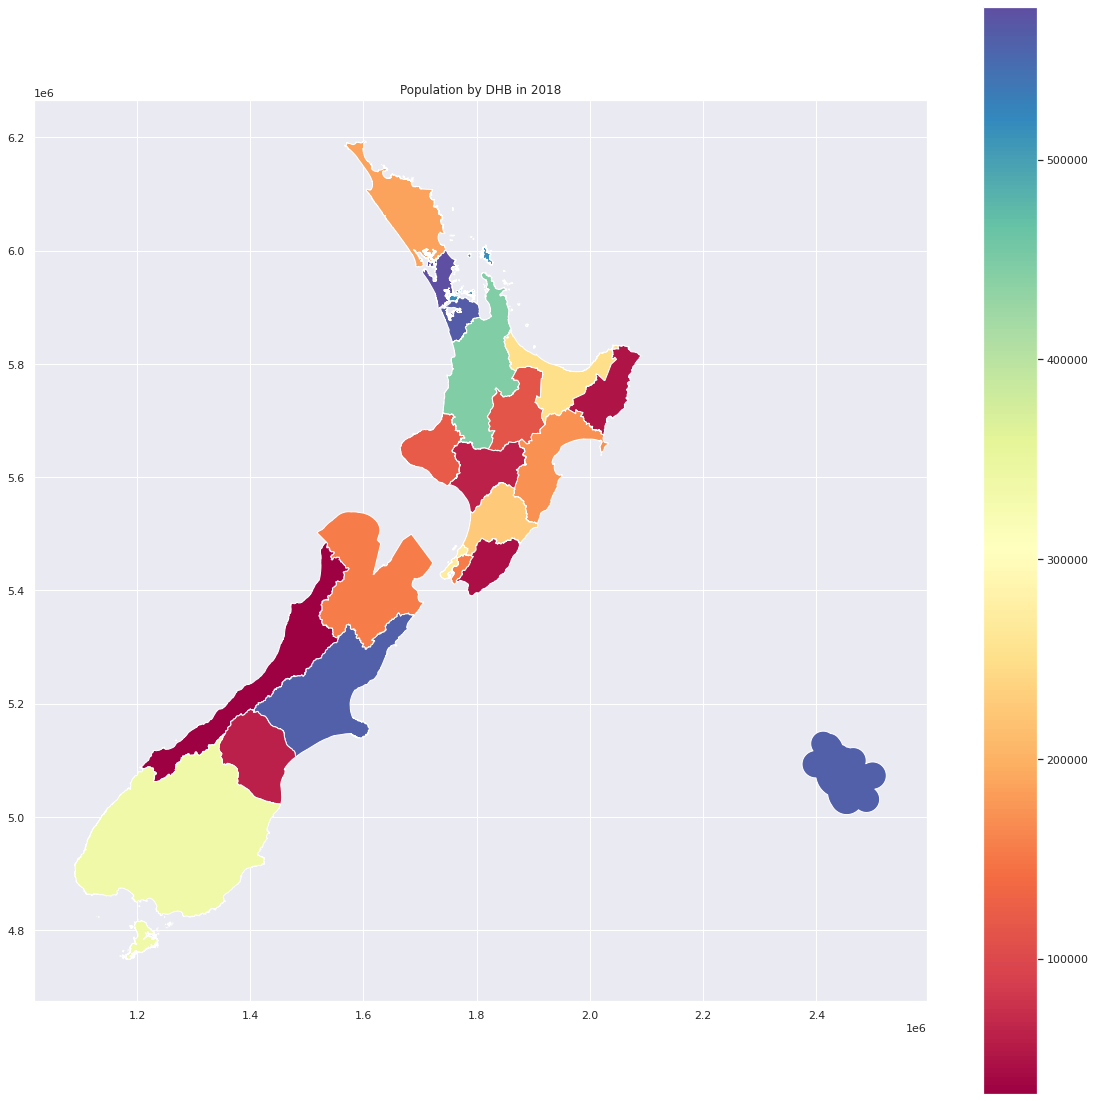

In [ ]:
ax = DHB.plot(column="pop_2018_total", legend=True, cmap="Spectral")
ax.set_title("Population by DHB in 2018")

In [ ]:
# Load all hospital discharge data from 2013-2019 into one data frame
discharges = []
for f in glob("input/hospital_discharges/*"):
    print(f)
    try:
        df = pd.read_csv(
            zipfile.ZipFile(f).open('PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252'
        )
    except KeyError:
        df = pd.read_csv(
            zipfile.ZipFile(f).open('PubFund_Data/PubFund_DischargesAll.txt'), delimiter='|', encoding='Windows-1252'
        )
    df.DHB.replace("Midcentral", "MidCentral", inplace=True)
    discharges.append(df)
discharges = pd.concat(discharges)
discharges

input/hospital_discharges/pubfund2016_17data.zip
input/hospital_discharges/pubfund2015_16data.zip
input/hospital_discharges/publicly-funded-discharges-2013-14-data.zip
input/hospital_discharges/publicly-funded-discharges-2014-15-data.zip
input/hospital_discharges/publicly-funded-hospital-data-2017-2018.zip
input/hospital_discharges/publicly-funded-hospital-data-2018-2019.zip


,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
0,2016/17,Counties Manukau,Pacific,Male,65-69,A00,A00 Cholera,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
1,2016/17,Auckland,Maori,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
2,2016/17,Auckland,Other,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
3,2016/17,Counties Manukau,Pacific,Female,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
4,2016/17,Auckland,Maori,Male,00-04,A01,A01 Typhoid and paratyphoid fevers,A00–A09 Intestinal infectious diseases,Chapter 1 Certain infectious and parasitic di...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
409504,20182019,Wairarapa,Other,Male,55-59,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409505,20182019,Waikato,Other,Male,60-64,Z80,Z80 Family history of malignant neoplasm,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409506,20182019,Northland,Maori,Female,00-04,Z82,Z82 Family history of certain disabilities and...,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN
409507,20182019,Northland,Maori,Male,25-29,Z84,Z84 Family history of other conditions,Z80–Z99 Persons with potential health hazards ...,Chapter 21 Factors influencing health status a...,1,NaN


In [ ]:
with pd.option_context('display.max_colwidth', None):
    display(discharges.sort_values(by="Discharges", ascending=False).head(10))

,FinancialYear,DHB,EthnicGroup,Sex,AgeGroup,ICDCode,ICDThreeChar,ICDSubgroup,ICDChapter,Discharges,ICDThreeCharCode
344935,2014/15,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2148,NaN
354531,2016/17,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2099,NaN
345001,2014/15,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2086,NaN
364182,2017/18,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2067,NaN
354593,2016/17,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,2034,NaN
339132,2013/14,Waitemata,Other,Male,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2030,Z38
339066,2013/14,Waitemata,Other,Female,00-04,NaN,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Z00–Z99 Factors influencing health status and contact with health services,2025,Z38
349182,2015/16,Waitemata,Other,Female,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1991,NaN
364244,2017/18,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1982,NaN
349244,2015/16,Waitemata,Other,Male,00-04,Z38,Z38 Liveborn infants according to place of birth,Z30–Z39 Persons encountering health services in circumstances related to reproduction,Chapter 21 Factors influencing health status and contact with health services,1933,NaN


The most common discharge reason appears to be for childbirth

In [ ]:
discharges.groupby("DHB")["Discharges"].sum().sort_values(ascending=False)

DHB
Waitemata             924552
Counties Manukau      786348
Canterbury            737913
Waikato               686812
Auckland              638673
Southern              469828
Capital and Coast     393409
Bay of Plenty         388231
Northland             305592
Hawke's Bay           266436
MidCentral            258823
Hutt Valley           238268
Taranaki              211696
Nelson Marlborough    204635
Lakes                 181994
Whanganui             119105
South Canterbury       99051
Tairawhiti             75723
Wairarapa              74094
West Coast             56462
Unknown                34050
Name: Discharges, dtype: int64

Waitemata DHB had the most overall discharges from 2013-2019 

In [ ]:
# Looks like there's some variation in how chapters are recorded - let's make it a bit more consistent
chapters = discharges.ICDChapter.unique().tolist()
chapters

['Chapter  1 Certain infectious and parasitic diseases',
 'Chapter  2 Neoplasms',
 'Chapter  3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter  4 Endocrine, nutritional and metabolic diseases',
 'Chapter  5 Mental and behavioural disorders',
 'Chapter  6 Diseases of the nervous system',
 'Chapter  7 Diseases of the eye and adnexa',
 'Chapter  8 Diseases of the ear and mastoid process',
 'Chapter  9 Diseases of the circulatory system',
 'Chapter 10 Diseases of the respiratory system',
 'Chapter 11 Diseases of the digestive system',
 'Chapter 12 Diseases of the skin and subcutaneous tissue',
 'Chapter 13 Diseases of the musculoskeletal system and connective tissue',
 'Chapter 14 Diseases of the genitourinary system',
 'Chapter 15 Pregnancy, childbirth and the puerperium',
 'Chapter 16 Certain conditions originating in the perinatal period',
 'Chapter 17 Congenital malformations, deformations and chromosomal abnormalities',
 'Cha

In [ ]:
target_chapters = chapters[40:49] + chapters[9:20]
target_chapters

['Chapter 1 Certain infectious and parasitic diseases',
 'Chapter 2 Neoplasms',
 'Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter 4 Endocrine, nutritional and metabolic diseases',
 'Chapter 5 Mental and behavioural disorders',
 'Chapter 6 Diseases of the nervous system',
 'Chapter 7 Diseases of the eye and adnexa',
 'Chapter 8 Diseases of the ear and mastoid process',
 'Chapter 9 Diseases of the circulatory system',
 'Chapter 10 Diseases of the respiratory system',
 'Chapter 11 Diseases of the digestive system',
 'Chapter 12 Diseases of the skin and subcutaneous tissue',
 'Chapter 13 Diseases of the musculoskeletal system and connective tissue',
 'Chapter 14 Diseases of the genitourinary system',
 'Chapter 15 Pregnancy, childbirth and the puerperium',
 'Chapter 16 Certain conditions originating in the perinatal period',
 'Chapter 17 Congenital malformations, deformations and chromosomal abnormalities',
 'Chapter 18 S

In [ ]:
replacement_dict = {k: v for k,v in zip(chapters[:9], target_chapters[:9])}
replacement_dict.update({k: v for k,v in zip(chapters[20:40], target_chapters)})
replacement_dict

{'Chapter  1 Certain infectious and parasitic diseases': 'Chapter 1 Certain infectious and parasitic diseases',
 'Chapter  2 Neoplasms': 'Chapter 2 Neoplasms',
 'Chapter  3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism': 'Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism',
 'Chapter  4 Endocrine, nutritional and metabolic diseases': 'Chapter 4 Endocrine, nutritional and metabolic diseases',
 'Chapter  5 Mental and behavioural disorders': 'Chapter 5 Mental and behavioural disorders',
 'Chapter  6 Diseases of the nervous system': 'Chapter 6 Diseases of the nervous system',
 'Chapter  7 Diseases of the eye and adnexa': 'Chapter 7 Diseases of the eye and adnexa',
 'Chapter  8 Diseases of the ear and mastoid process': 'Chapter 8 Diseases of the ear and mastoid process',
 'Chapter  9 Diseases of the circulatory system': 'Chapter 9 Diseases of the circulatory system',
 'A00–B99 Certain in

In [ ]:
discharges.ICDChapter = discharges.ICDChapter.replace(replacement_dict)
discharges.ICDChapter.value_counts(dropna=False)

Chapter 19 Injury, poisoning and certain other consequences external causes                                  493542
Chapter 11 Diseases of the digestive system                                                                  200696
Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified           182502
Chapter 9 Diseases of the circulatory system                                                                 155399
Chapter 2 Neoplasms                                                                                          144812
Chapter 13 Diseases of the musculoskeletal system and connective tissue                                      143358
Chapter 10 Diseases of the respiratory system                                                                141126
Chapter 14 Diseases of the genitourinary system                                                              119736
Chapter 21 Factors influencing health status and contact with health ser

In [ ]:
discharges["ICDSubgroup"].value_counts(dropna=False).head(20)

S00–S09 Injuries to the head                                                            90762
Z40–Z54 Persons encountering health services for specific procedures and health care    63054
S60–S69 Injuries to the wrist and hand                                                  57905
I30–I52 Other forms of heart disease                                                    45265
R50–R69 General symptoms and signs                                                      44658
S80–S89 Injuries to the knee and lower leg                                              42575
J09–J18 Influenza and pneumonia                                                         37131
L00–L08 Infections of the skin and subcutaneous tissue                                  34612
T80–T88 Complications of surgical and medical care, not elsewhere classified            34321
R00–R09 Symptoms and signs involving the circulatory and respiratory systems            32782
K55–K64 Other diseases of intestines                        

In [ ]:
discharges["ICDThreeChar"].value_counts(dropna=False).head(20)

S06 Intracranial injury                                29367
Z50 Care involving use of rehabilitation procedures    27225
S82 Fracture of lower leg, including ankle             26338
S52 Fracture of forearm                                23616
L03 Cellulitis                                         23534
S62 Fracture at wrist and hand level                   19440
S01 Open wound of head                                 18676
J18 Pneumonia, organism unspecified                    16995
S42 Fracture of shoulder and upper arm                 16777
S09 Other and unspecified injuries of head             15398
R55 Syncope and collapse                               15338
S61 Open wound of wrist and hand                       14453
R10 Abdominal and pelvic pain                          14000
R07 Pain in throat and chest                           13648
S02 Fracture of skull and facial bones                 12906
N39 Other disorders of urinary system                  12753
I21 Acute myocardial inf

Text(0, 0.5, '# discharges')

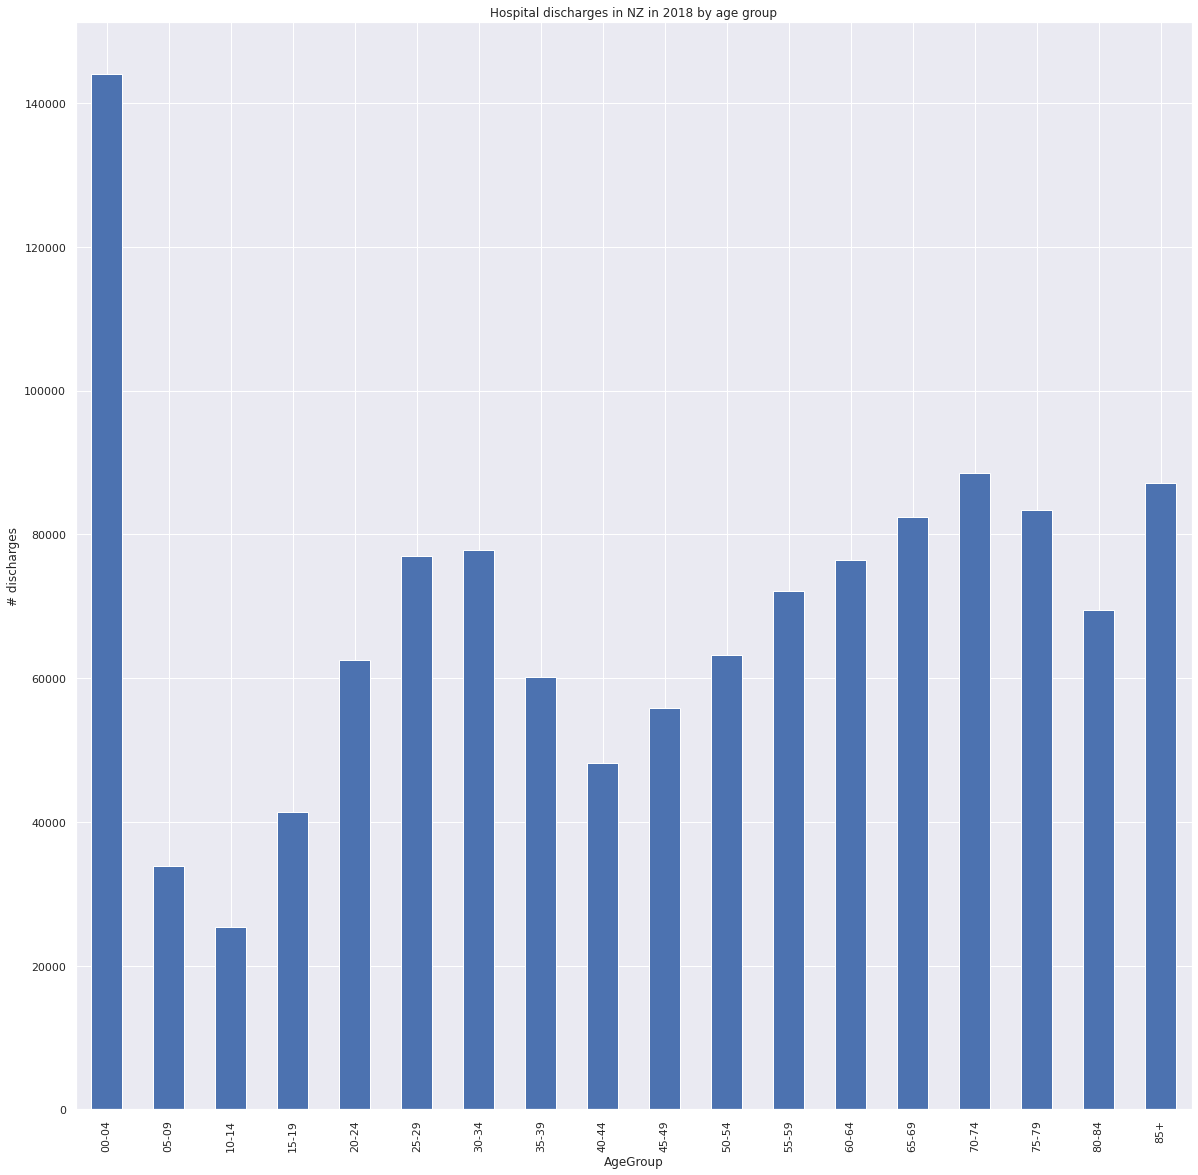

In [ ]:
discharges[discharges.FinancialYear == 20182019].groupby("AgeGroup")["Discharges"].sum().plot.bar()
plt.title("Hospital discharges in NZ in 2018 by age group")
plt.ylabel("# discharges")

In [ ]:
discharges.FinancialYear.value_counts(dropna=False)

20182019    409509
2017/18     377960
2016/17     368295
2015/16     362851
2014/15     358697
2013/14     352666
Name: FinancialYear, dtype: int64

In [ ]:
discharges["year"] = discharges.FinancialYear.astype(str).str.slice(stop=4)
discharges.year.value_counts(dropna=False)

2018    409509
2017    377960
2016    368295
2015    362851
2014    358697
2013    352666
Name: year, dtype: int64

In [ ]:
discharge_years = sorted(discharges.year.unique())
discharge_years

['2013', '2014', '2015', '2016', '2017', '2018']

In [ ]:
# Restructure discharge data so we have one row per DHB, and separate chapter discharge data in columns
rows = []
for d in tqdm(discharges.DHB.unique()):
    row = {"DHB": d}
    discharges_for_dhb = discharges[discharges.DHB == d]
    for year in sorted(discharges.year.unique()):
        discharges_for_year = discharges_for_dhb[discharges_for_dhb.year == year]
        for chapter in target_chapters:
            new_col = f"discharges_{year}_{chapter}"
            value = discharges_for_year.Discharges[discharges_for_year.ICDChapter == chapter].sum()
            row[new_col] = value
    rows.append(row)
discharges = pd.DataFrame(rows)
discharges

  0%|          | 0/21 [00:00<?, ?it/s]

,DHB,discharges_2013_Chapter 1 Certain infectious and parasitic diseases,discharges_2013_Chapter 2 Neoplasms,discharges_2013_Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"discharges_2013_Chapter 4 Endocrine, nutritional and metabolic diseases",discharges_2013_Chapter 5 Mental and behavioural disorders,discharges_2013_Chapter 6 Diseases of the nervous system,discharges_2013_Chapter 7 Diseases of the eye and adnexa,discharges_2013_Chapter 8 Diseases of the ear and mastoid process,discharges_2013_Chapter 9 Diseases of the circulatory system,...,discharges_2018_Chapter 11 Diseases of the digestive system,discharges_2018_Chapter 12 Diseases of the skin and subcutaneous tissue,discharges_2018_Chapter 13 Diseases of the musculoskeletal system and connective tissue,discharges_2018_Chapter 14 Diseases of the genitourinary system,"discharges_2018_Chapter 15 Pregnancy, childbirth and the puerperium",discharges_2018_Chapter 16 Certain conditions originating in the perinatal period,"discharges_2018_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","discharges_2018_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes",discharges_2018_Chapter 21 Factors influencing health status and contact with health services
0,Counties Manukau,4063,7369,1614,3240,2160,2974,2559,1300,7884,...,9194,4086,6683,6970,13383,3514,971,11889,14297,17126
1,Auckland,3520,4967,1047,2243,2284,2354,2614,1198,6093,...,8010,3347,6104,5559,9288,1466,703,10550,13551,13934
2,Hawke's Bay,1223,3068,459,866,810,911,1314,325,3495,...,4635,1168,2903,2335,3548,833,363,5927,5391,3692
3,Waitemata,4589,8449,1825,2649,2845,3212,2569,1419,9970,...,15607,4096,8960,8068,11635,1855,1137,18698,18301,17270
4,MidCentral,1136,3234,511,1083,943,1127,1063,322,3309,...,3766,893,2419,2211,3637,606,290,5018,4628,4500
5,Waikato,2627,7088,1421,2170,2141,3025,2214,975,6557,...,11382,2898,5718,5377,8709,1547,667,14358,13669,17464
6,Whanganui,658,1582,141,409,364,463,264,122,1610,...,2003,511,1289,1167,1350,218,113,2307,2357,1500
7,Hutt Valley,1166,2449,584,763,832,921,665,366,2667,...,4227,1199,2070,1953,3415,639,270,5238,4548,3828
8,Lakes,837,1745,552,550,610,683,632,320,2132,...,3017,694,1561,1495,2623,630,267,3505,3372,2897
9,Canterbury,2773,8920,1340,2169,3353,2772,2133,1044,8365,...,10511,2696,8102,6404,11841,2171,847,9728,14191,17704


In [ ]:
discharges = discharges.set_index("DHB")

In [ ]:
DHB = DHB.merge(discharges, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,discharges_2018_Chapter 11 Diseases of the digestive system,discharges_2018_Chapter 12 Diseases of the skin and subcutaneous tissue,discharges_2018_Chapter 13 Diseases of the musculoskeletal system and connective tissue,discharges_2018_Chapter 14 Diseases of the genitourinary system,"discharges_2018_Chapter 15 Pregnancy, childbirth and the puerperium",discharges_2018_Chapter 16 Certain conditions originating in the perinatal period,"discharges_2018_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","discharges_2018_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","discharges_2018_Chapter 19 Injury, poisoning and certain other consequences external causes",discharges_2018_Chapter 21 Factors influencing health status and contact with health services
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,5980,1206,2265,2182,3516,672,314,6104,5601,5415
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,15607,4096,8960,8068,11635,1855,1137,18698,18301,17270
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,8010,3347,6104,5559,9288,1466,703,10550,13551,13934
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,9194,4086,6683,6970,13383,3514,971,11889,14297,17126
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,11382,2898,5718,5377,8709,1547,667,14358,13669,17464
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,3017,694,1561,1495,2623,630,267,3505,3372,2897
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,7557,1412,3660,3133,4739,1006,433,7426,7540,6003
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,1274,446,623,673,903,179,119,1376,1424,1693
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,3465,913,2694,1661,2626,622,178,5475,4076,3601
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,4635,1168,2903,2335,3548,833,363,5927,5391,3692


In [ ]:
header = []
for k in ["Total households", "median", "<$20K", "$20K-$30K", "$30K-$50K",
            "$50K-$70K", "$70K-$100K", "$100K-$150K", ">$150K", "Total households stated", "Not stated"]:
    header.append("income_2013_" + k)
    header.append("income_2018_" + k)
header = ["area"] + header
income = pd.read_excel("input/total_household_income_2013_2018_census_by_DHB.xlsx",
                        skiprows=5,
                        names=header,
                        usecols="A,C:X",
                        index_col=0,
                        nrows=20)
income[income.columns[income.columns!="area"]]
income

,income_2013_Total households,income_2018_Total households,income_2013_median,income_2018_median,income_2013_<$20K,income_2018_<$20K,income_2013_$20K-$30K,income_2018_$20K-$30K,income_2013_$30K-$50K,income_2018_$30K-$50K,...,income_2013_$70K-$100K,income_2018_$70K-$100K,income_2013_$100K-$150K,income_2018_$100K-$150K,income_2013_>$150K,income_2018_>$150K,income_2013_Total households stated,income_2018_Total households stated,income_2013_Not stated,income_2018_Not stated
area,,,,,,,,,,,,,,,,,,,,,
Northland,58944,64251,46900,57000,7623,7248,7131,7617,10395,10995,...,7545,8895,4929,8919,2772,5679,47625,58182,11322,6069
Waitemata,181143,193440,75800,94000,13437,12399,13971,13482,23754,21171,...,28158,26706,29928,38730,24771,44724,154764,177660,26376,15780
Auckland,153363,159009,80100,97900,14766,13647,9990,9948,16998,15324,...,20529,19746,22134,27447,28845,43782,129141,145278,24222,13734
Counties Manukau,140523,150702,73500,90100,11328,11289,9774,9987,17217,16431,...,21465,21345,21651,30867,15852,30552,112914,136875,27609,13830
Waikato,133578,144243,58900,68500,13656,12924,13401,14115,21609,21543,...,20580,21690,16398,24915,10473,18555,113349,133143,20229,11100
Lakes,37086,38886,55900,65500,3756,3297,3732,3849,6111,5907,...,5589,6090,4014,6222,2127,3975,30243,34812,6840,4074
Bay of Plenty,79299,87105,54600,67200,7980,6804,8769,9201,14274,13821,...,11724,12789,8922,14688,5040,10887,67164,79737,12135,7368
Tairawhiti,15993,16410,50500,57900,1950,1812,1755,1947,2661,2712,...,2241,2412,1413,2334,732,1350,12852,14928,3141,1482
Taranaki,43080,45306,58400,63500,4377,4329,4545,5076,6939,7353,...,6531,6888,5088,7230,3486,5148,36600,42324,6480,2982


<AxesSubplot:xlabel='area'>

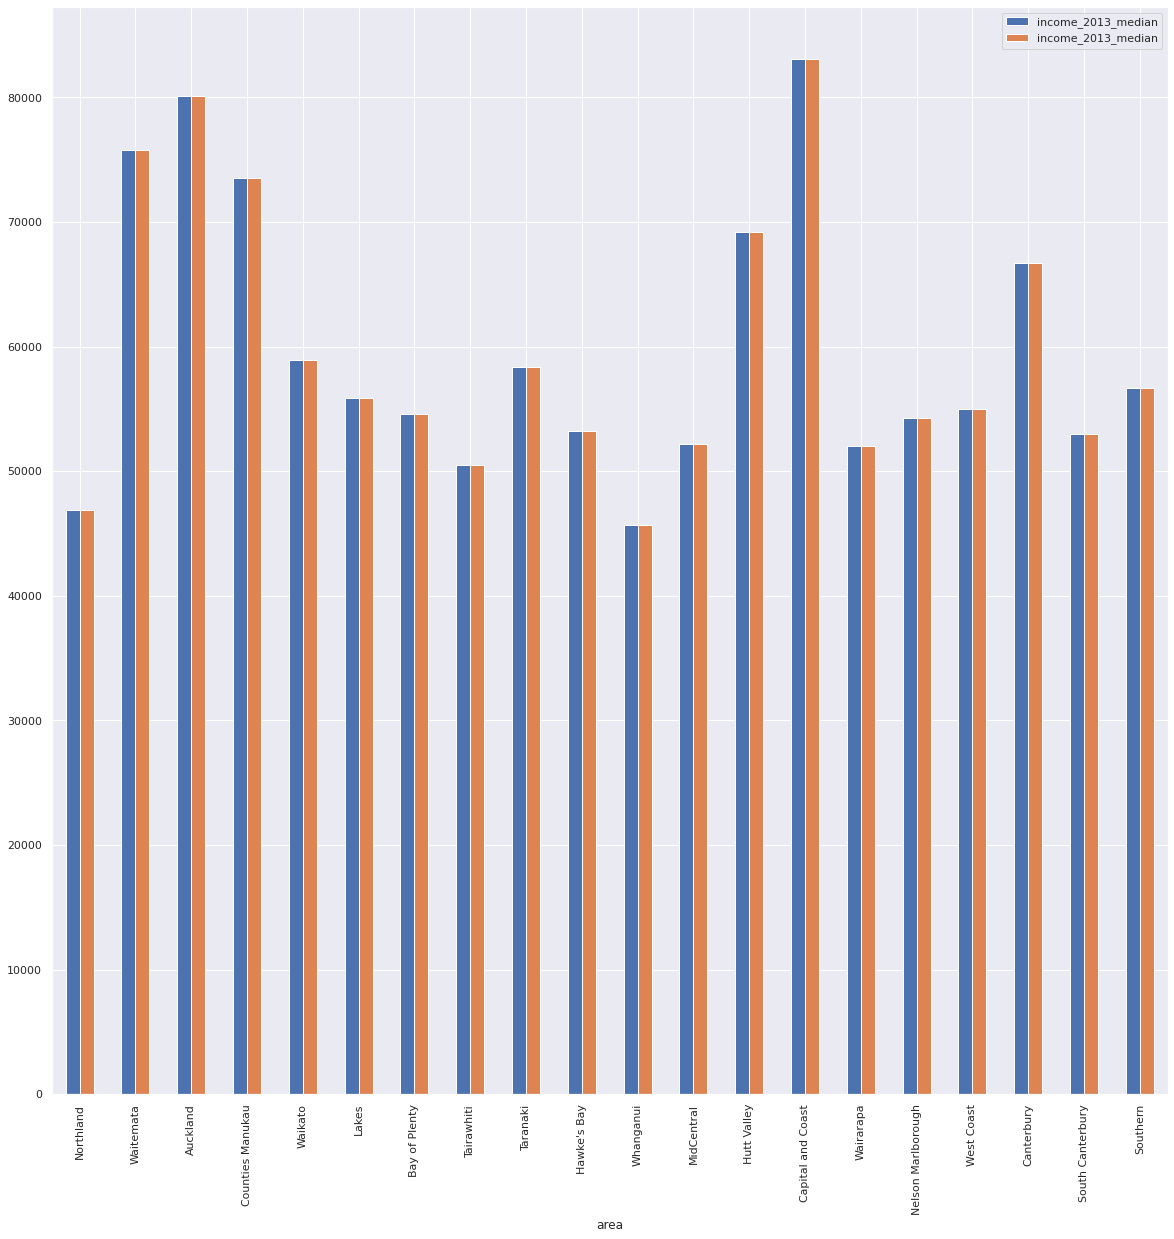

In [ ]:
income[["income_2013_median", "income_2013_median"]].plot(kind="bar")

In [ ]:
DHB = DHB.merge(income, left_on="DHB2015_Name", right_index=True, how="left")
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,income_2013_$70K-$100K,income_2018_$70K-$100K,income_2013_$100K-$150K,income_2018_$100K-$150K,income_2013_>$150K,income_2018_>$150K,income_2013_Total households stated,income_2018_Total households stated,income_2013_Not stated,income_2018_Not stated
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,7545,8895,4929,8919,2772,5679,47625,58182,11322,6069
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,28158,26706,29928,38730,24771,44724,154764,177660,26376,15780
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,20529,19746,22134,27447,28845,43782,129141,145278,24222,13734
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,21465,21345,21651,30867,15852,30552,112914,136875,27609,13830
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,20580,21690,16398,24915,10473,18555,113349,133143,20229,11100
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,5589,6090,4014,6222,2127,3975,30243,34812,6840,4074
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,11724,12789,8922,14688,5040,10887,67164,79737,12135,7368
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,2241,2412,1413,2334,732,1350,12852,14928,3141,1482
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,6531,6888,5088,7230,3486,5148,36600,42324,6480,2982
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,8745,9366,5964,9639,3102,6003,48687,55764,8919,4440


In [ ]:
print(DHB.columns.tolist())

['DHB2015_Code', 'DHB2015_Name', 'Shape_Length', 'geometry', 'TALBs', 'pop_1996_0-14', 'pop_1996_15-39', 'pop_1996_40-64', 'pop_1996_65+', 'pop_1996_total', 'pop_1996_median age', 'pop_2001_0-14', 'pop_2001_15-39', 'pop_2001_40-64', 'pop_2001_65+', 'pop_2001_total', 'pop_2001_median age', 'pop_2006_0-14', 'pop_2006_15-39', 'pop_2006_40-64', 'pop_2006_65+', 'pop_2006_total', 'pop_2006_median age', 'pop_2013_0-14', 'pop_2013_15-39', 'pop_2013_40-64', 'pop_2013_65+', 'pop_2013_total', 'pop_2013_median age', 'pop_2018_0-14', 'pop_2018_15-39', 'pop_2018_40-64', 'pop_2018_65+', 'pop_2018_total', 'pop_2018_median age', 'pop_2023_0-14', 'pop_2023_15-39', 'pop_2023_40-64', 'pop_2023_65+', 'pop_2023_total', 'pop_2023_median age', 'pop_2028_0-14', 'pop_2028_15-39', 'pop_2028_40-64', 'pop_2028_65+', 'pop_2028_total', 'pop_2028_median age', 'pop_2033_0-14', 'pop_2033_15-39', 'pop_2033_40-64', 'pop_2033_65+', 'pop_2033_total', 'pop_2033_median age', 'pop_2038_0-14', 'pop_2038_15-39', 'pop_2038_40-64

In [ ]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)

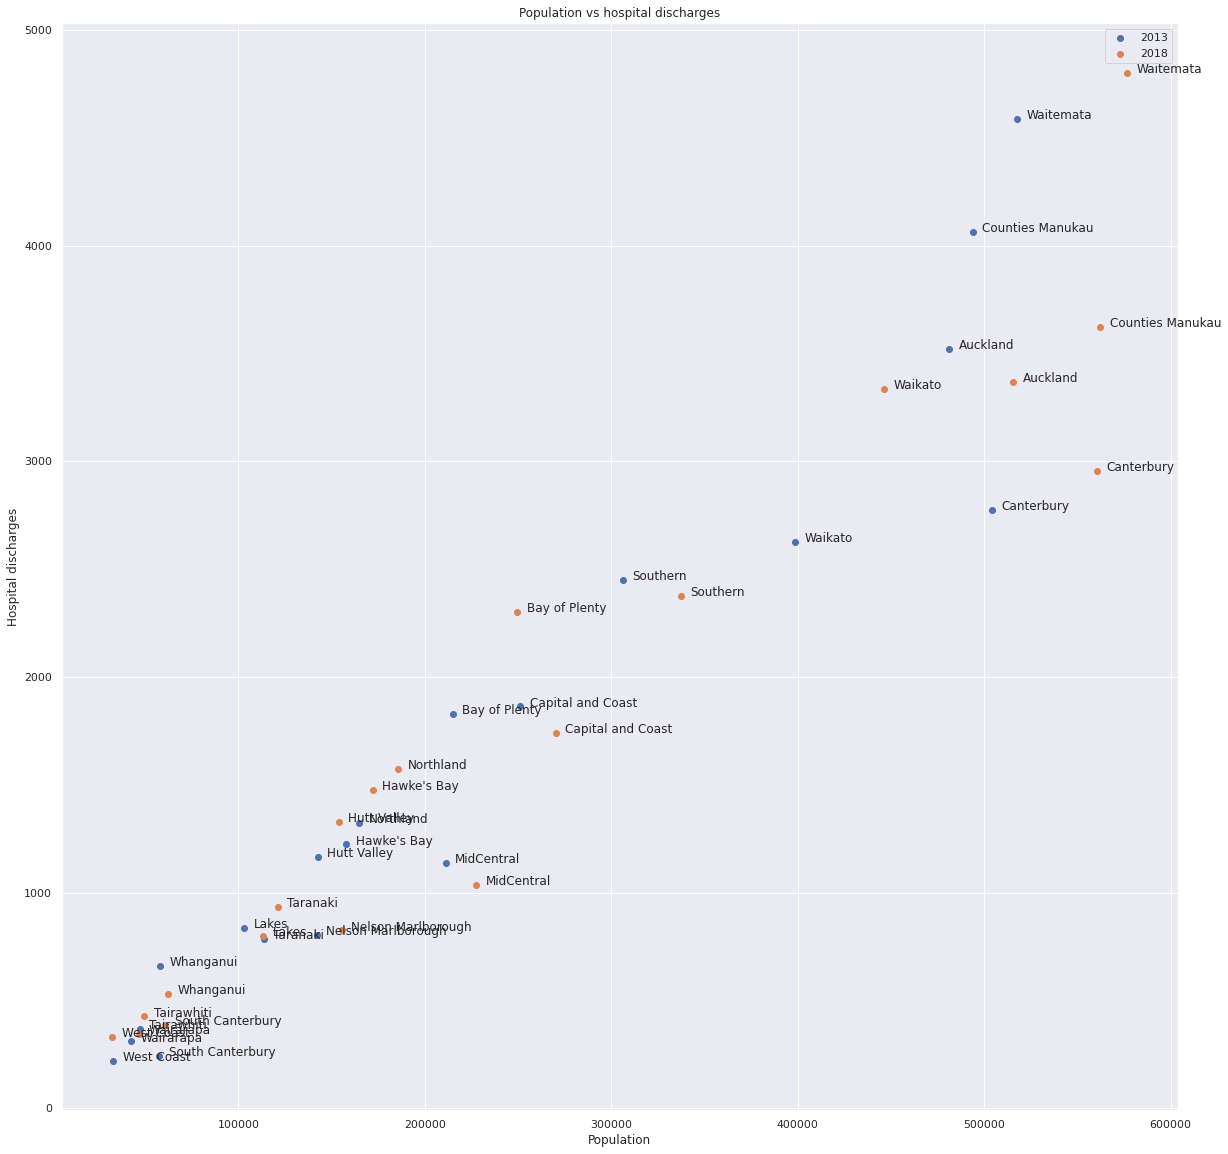

In [ ]:
plt.scatter(DHB.pop_2013_total, DHB["discharges_2013_Chapter 1 Certain infectious and parasitic diseases"], label="2013")
plt.scatter(DHB.pop_2018_total, DHB["discharges_2018_Chapter 1 Certain infectious and parasitic diseases"], label="2018")
for i, d in DHB.iterrows():
    plt.text(d.pop_2013_total + 5e3, d["discharges_2013_Chapter 1 Certain infectious and parasitic diseases"], d.DHB2015_Name)
    plt.text(d.pop_2018_total + 5e3, d["discharges_2018_Chapter 1 Certain infectious and parasitic diseases"], d.DHB2015_Name)
plt.xlabel("Population")
plt.ylabel("Hospital discharges")
plt.title("Population vs hospital discharges")
plt.legend()

This looks pretty linearly correlated, so a linear model should be able to predict this nicely

# Train some models

In [ ]:
def get_data_for_year(year, total_pop_only = False, include_DHB_code = True, income=None):
    year = str(year)
    x_cols = []
    if include_DHB_code:
        x_cols.append("DHB2015_Code")
    if total_pop_only:
        x_cols.append(f"pop_{year}_total")
    else:
        x_cols.extend(list(DHB.columns[DHB.columns.str.contains(f"pop_{year}")]))
    if income == "median":
        x_cols.append(f"income_{year}_median")
    elif income == "all":
        x_cols.extend([c for c in DHB.columns if c.startswith(f"income_{year}") and ("median" in c or "$" in c)])
    y_cols = list(DHB.columns[DHB.columns.str.contains(f"discharges_{year}")])
    x = DHB[x_cols].astype(float)
    x.columns = x.columns.str.replace(year, "")
    x.index = DHB.DHB2015_Name
    if y_cols:
        y = DHB[y_cols]
        y.columns = target_chapters
        y.index = DHB.DHB2015_Name
    else:
        y = "?"
    return x,y

x_train, y_train = get_data_for_year(2013)
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
x_test, y_test = get_data_for_year(2018)
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}\n")

x_train shape: (20, 7), y_train shape: (20, 20)
x_test shape: (20, 7), y_test shape: (20, 20)



In [ ]:
model = sklearn.linear_model.LinearRegression()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.7747238627462034

In [ ]:
for chapter in target_chapters:
    model = sm.OLS(y_train[chapter], sm.add_constant(x_train)).fit()
    display(model.summary(alpha=.05))
    print("95% confidence interval:")
    display(pd.DataFrame(
        model.get_prediction(
            sm.add_constant(x_test)
        ).conf_int(alpha = .05),
        columns=["low", "high"],
        index=x_train.index
    ))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Chapter 1 Certain infectious and parasitic diseases   R-squared:                       0.967
Model:                                                             OLS   Adj. R-squared:                  0.948
Method:                                                  Least Squares   F-statistic:                     50.98
Date:                                                 Thu, 26 May 2022   Prob (F-statistic):           5.51e-08
Time:                                                         13:22:09   Log-Likelihood:                -137.06
No. Observations:                                                   20   AIC:                             290.1
Df Residuals:                                                       12   BIC:                             298.1
Df Model:                                                            7                                         
Covariance Type:                                             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             407.0033    220.826      1.843      0.090     -74.134     888.141
DHB2015_Code      -27.9245     14.274     -1.956      0.074     -59.024       3.175
pop__0-14           1.4408      0.801      1.799      0.097      -0.305       3.186
pop__15-39          1.4140      0.796      1.777      0.101      -0.320       3.148
pop__40-64          1.4547      0.795      1.829      0.092      -0.278       3.188
pop__65+            1.3733      0.795      1.726      0.110      -0.360       3.106
pop__total         -1.4217      0.797     -1.784      0.100      -3.158       0.315
pop__median age     2.0274      1.680      1.207      0.251      -1.633       5.688
==============================================================================
Omnibus:                        0.298   Durbin-Watson:                   1.701
Prob(Omnibus):                  0.862   Jarque-Bera (JB):                0.453
Skew:                           0.209   Prob(JB):                        0.797
Kurtosis:                       2.393   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,871.399105,2255.445670
Waitemata,3189.114708,4507.407442
Auckland,1881.826479,4141.983355
Counties Manukau,3359.754028,5853.390392
Waikato,2095.064849,3655.873839
Lakes,593.090728,1225.481698
Bay of Plenty,662.917264,2234.856989
Tairawhiti,217.274650,805.432555
Taranaki,668.783394,1165.044998


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Chapter 2 Neoplasms   R-squared:                       0.992
Model:                             OLS   Adj. R-squared:                  0.988
Method:                  Least Squares   F-statistic:                     223.1
Date:                 Thu, 26 May 2022   Prob (F-statistic):           9.63e-12
Time:                         13:22:09   Log-Likelihood:                -135.82
No. Observations:                   20   AIC:                             287.6
Df Residuals:                       12   BIC:                             295.6
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -55.8216    207.525     -0.269      0.793    -507.980     396.336
DHB2015_Code        6.3811     13.414      0.476      0.643     -22.845      35.607
pop__0-14          -1.3844      0.753     -1.839      0.091      -3.025       0.256
pop__15-39         -1.4583      0.748     -1.950      0.075      -3.088       0.171
pop__40-64         -1.3171      0.748     -1.762      0.104      -2.946       0.312
pop__65+           -1.4171      0.748     -1.896      0.082      -3.046       0.212
pop__total          1.4084      0.749      1.881      0.084      -0.223       3.040
pop__median age    -1.0293      1.579     -0.652      0.527      -4.469       2.411
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   2.886
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.902
Skew:                           0.192   Prob(JB):                        0.637
Kurtosis:                       2.033   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2592.867887,3893.551465
Waitemata,7844.416525,9083.306714
Auckland,3422.278712,5546.303298
Counties Manukau,5147.501314,7490.942605
Waikato,5761.307728,7228.107093
Lakes,1546.005461,2140.306672
Bay of Plenty,3349.850519,4827.110200
Tairawhiti,553.549503,1106.281866
Taranaki,1875.197232,2341.568332


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                        OLS Regression Results                                                                       
=====================================================================================================================================================================
Dep. Variable:     Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism   R-squared:                       0.966
Model:                                                                                                                   OLS   Adj. R-squared:                  0.946
Method:                                                                                                        Least Squares   F-statistic:                     48.20
Date:                                                                                                       Thu, 26 May 2022   Prob (F-statistic):           7.60e-08
Time:                                                                                                               13:22:09   Log-Likelihood:                -118.89
No. Observations:                                                                                                         20   AIC:                             253.8
Df Residuals:                                                                                                             12   BIC:                             261.7
Df Model:                                                                                                                  7                                         
Covariance Type:                                                                                                   nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              90.4289     89.013      1.016      0.330    -103.514     284.372
DHB2015_Code       -7.9800      5.754     -1.387      0.191     -20.516       4.556
pop__0-14          -0.1273      0.323     -0.394      0.700      -0.831       0.576
pop__15-39         -0.1489      0.321     -0.464      0.651      -0.848       0.550
pop__40-64         -0.1178      0.321     -0.368      0.720      -0.816       0.581
pop__65+           -0.1567      0.321     -0.489      0.634      -0.855       0.542
pop__total          0.1381      0.321      0.430      0.675      -0.562       0.838
pop__median age     0.5884      0.677      0.869      0.402      -0.887       2.064
==============================================================================
Omnibus:                        1.657   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.437   Jarque-Bera (JB):                1.015
Skew:                           0.189   Prob(JB):                        0.602
Kurtosis:                       1.963   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,288.288681,846.186597
Waitemata,1260.763733,1792.156814
Auckland,356.988614,1268.039473
Counties Manukau,906.381249,1911.545791
Waikato,871.946891,1501.096304
Lakes,228.045385,482.957043
Bay of Plenty,284.114728,917.750849
Tairawhiti,62.781420,299.863089
Taranaki,278.164749,478.203766


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                              
===================================================================================================================
Dep. Variable:     Chapter 4 Endocrine, nutritional and metabolic diseases   R-squared:                       0.989
Model:                                                                 OLS   Adj. R-squared:                  0.983
Method:                                                      Least Squares   F-statistic:                     156.4
Date:                                                     Thu, 26 May 2022   Prob (F-statistic):           7.91e-11
Time:                                                             13:22:09   Log-Likelihood:                -118.57
No. Observations:                                                       20   AIC:                             253.1
Df Residuals:                                                           12   BIC:                             261.1
Df Model:                                                                7                                         
Covariance Type:                                                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              66.8792     87.604      0.763      0.460    -123.994     257.753
DHB2015_Code       -0.9324      5.663     -0.165      0.872     -13.270      11.405
pop__0-14           0.8105      0.318      2.550      0.025       0.118       1.503
pop__15-39          0.7766      0.316      2.460      0.030       0.089       1.465
pop__40-64          0.7568      0.316      2.398      0.034       0.069       1.444
pop__65+            0.7805      0.316      2.473      0.029       0.093       1.468
pop__total         -0.7729      0.316     -2.445      0.031      -1.462      -0.084
pop__median age     0.6232      0.667      0.935      0.368      -0.829       2.075
==============================================================================
Omnibus:                        6.346   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                3.998
Skew:                           1.022   Prob(JB):                        0.135
Kurtosis:                       3.788   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,948.589964,1497.658786
Waitemata,2546.670317,3069.653760
Auckland,1690.588804,2587.221695
Counties Manukau,3363.551762,4352.808927
Waikato,2319.944356,2939.137074
Lakes,581.078816,831.956332
Bay of Plenty,1179.553342,1803.161763
Tairawhiti,265.457733,498.787432
Taranaki,640.489037,837.362308


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        OLS Regression Results                                        
======================================================================================================
Dep. Variable:     Chapter 5 Mental and behavioural disorders   R-squared:                       0.925
Model:                                                    OLS   Adj. R-squared:                  0.881
Method:                                         Least Squares   F-statistic:                     21.06
Date:                                        Thu, 26 May 2022   Prob (F-statistic):           7.68e-06
Time:                                                13:22:09   Log-Likelihood:                -139.50
No. Observations:                                          20   AIC:                             295.0
Df Residuals:                                              12   BIC:                             303.0
Df Model:                                                   7                                         
Covariance Type:                                    nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -47.4962    249.535     -0.190      0.852    -591.187     496.195
DHB2015_Code       14.5336     16.129      0.901      0.385     -20.609      49.676
pop__0-14          -0.4837      0.905     -0.534      0.603      -2.456       1.489
pop__15-39         -0.4640      0.899     -0.516      0.615      -2.424       1.496
pop__40-64         -0.4478      0.899     -0.498      0.627      -2.406       1.511
pop__65+           -0.4489      0.899     -0.499      0.627      -2.407       1.510
pop__total          0.4675      0.900      0.519      0.613      -1.494       2.429
pop__median age    -1.9094      1.899     -1.006      0.334      -6.046       2.227
==============================================================================
Omnibus:                        3.094   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.213   Jarque-Bera (JB):                1.829
Skew:                           0.737   Prob(JB):                        0.401
Kurtosis:                       3.150   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,267.503188,1831.491696
Waitemata,2691.389608,4181.075533
Auckland,1699.217421,4253.220639
Counties Manukau,1081.745187,3899.582907
Waikato,1392.303923,3156.036001
Lakes,305.996985,1020.606042
Bay of Plenty,635.136456,2411.446393
Tairawhiti,-26.416637,638.208548
Taranaki,454.121755,1014.903066


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Chapter 6 Diseases of the nervous system   R-squared:                       0.967
Model:                                                  OLS   Adj. R-squared:                  0.948
Method:                                       Least Squares   F-statistic:                     50.77
Date:                                      Thu, 26 May 2022   Prob (F-statistic):           5.64e-08
Time:                                              13:22:09   Log-Likelihood:                -132.18
No. Observations:                                        20   AIC:                             280.4
Df Residuals:                                            12   BIC:                             288.3
Df Model:                                                 7                                         
Covariance Type:                                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -173.5035    173.051     -1.003      0.336    -550.550     203.543
DHB2015_Code        9.4838     11.186      0.848      0.413     -14.888      33.855
pop__0-14          -0.8487      0.628     -1.352      0.201      -2.216       0.519
pop__15-39         -0.8662      0.624     -1.389      0.190      -2.225       0.493
pop__40-64         -0.8488      0.623     -1.362      0.198      -2.207       0.509
pop__65+           -0.8734      0.623     -1.401      0.187      -2.232       0.485
pop__total          0.8634      0.624      1.383      0.192      -0.497       2.224
pop__median age     1.2755      1.317      0.969      0.352      -1.593       4.144
==============================================================================
Omnibus:                        0.852   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.653   Jarque-Bera (JB):                0.798
Skew:                           0.413   Prob(JB):                        0.671
Kurtosis:                       2.474   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,260.813254,1345.430819
Waitemata,2709.037193,3742.126318
Auckland,1751.762058,3522.949466
Counties Manukau,1914.930311,3869.085518
Waikato,2109.976226,3333.114876
Lakes,344.026156,839.603669
Bay of Plenty,686.153299,1918.014625
Tairawhiti,0.561462,461.475431
Taranaki,506.370309,895.269113


<class 'statsmodels.iolib.summary.Summary'>
"""
                                       OLS Regression Results                                       
====================================================================================================
Dep. Variable:     Chapter 7 Diseases of the eye and adnexa   R-squared:                       0.935
Model:                                                  OLS   Adj. R-squared:                  0.898
Method:                                       Least Squares   F-statistic:                     24.77
Date:                                      Thu, 26 May 2022   Prob (F-statistic):           3.18e-06
Time:                                              13:22:09   Log-Likelihood:                -135.80
No. Observations:                                        20   AIC:                             287.6
Df Residuals:                                            12   BIC:                             295.6
Df Model:                                                 7                                         
Covariance Type:                                  nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             350.4662    207.388      1.690      0.117    -101.393     802.326
DHB2015_Code      -24.1378     13.405     -1.801      0.097     -53.345       5.069
pop__0-14           0.6012      0.752      0.799      0.440      -1.038       2.240
pop__15-39          0.5965      0.747      0.798      0.440      -1.032       2.225
pop__40-64          0.5839      0.747      0.782      0.450      -1.044       2.211
pop__65+            0.6054      0.747      0.810      0.434      -1.022       2.233
pop__total         -0.5909      0.748     -0.790      0.445      -2.221       1.040
pop__median age     1.9108      1.578      1.211      0.249      -1.527       5.349
==============================================================================
Omnibus:                        5.281   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.071   Jarque-Bera (JB):                3.632
Skew:                           1.038   Prob(JB):                        0.163
Kurtosis:                       3.216   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,821.164462,2120.989823
Waitemata,2324.201091,3562.273835
Auckland,1640.044128,3762.667241
Counties Manukau,1929.030905,4270.925947
Waikato,2074.799199,3540.630740
Lakes,516.167734,1110.076813
Bay of Plenty,954.799598,2431.084553
Tairawhiti,157.414854,709.782513
Taranaki,620.937588,1087.000968


<class 'statsmodels.iolib.summary.Summary'>
"""
                                            OLS Regression Results                                           
=============================================================================================================
Dep. Variable:     Chapter 8 Diseases of the ear and mastoid process   R-squared:                       0.988
Model:                                                           OLS   Adj. R-squared:                  0.982
Method:                                                Least Squares   F-statistic:                     146.5
Date:                                               Thu, 26 May 2022   Prob (F-statistic):           1.17e-10
Time:                                                       13:22:09   Log-Likelihood:                -104.68
No. Observations:                                                 20   AIC:                             225.4
Df Residuals:                                                     12   BIC:                             233.3
Df Model:                                                          7                                         
Covariance Type:                                           nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              60.6561     43.750      1.386      0.191     -34.668     155.980
DHB2015_Code       -5.6772      2.828     -2.008      0.068     -11.839       0.484
pop__0-14           0.1506      0.159      0.949      0.361      -0.195       0.496
pop__15-39          0.1454      0.158      0.922      0.375      -0.198       0.489
pop__40-64          0.1610      0.158      1.022      0.327      -0.182       0.504
pop__65+            0.1289      0.158      0.818      0.429      -0.214       0.472
pop__total         -0.1474      0.158     -0.933      0.369      -0.491       0.197
pop__median age     0.7065      0.333      2.123      0.055      -0.019       1.432
==============================================================================
Omnibus:                        1.268   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.029
Skew:                           0.336   Prob(JB):                        0.598
Kurtosis:                       2.115   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,232.320134,506.529838
Waitemata,1150.457462,1411.639903
Auckland,868.873690,1316.659887
Counties Manukau,1105.678133,1599.721691
Waikato,755.761830,1064.992012
Lakes,184.454689,309.745084
Bay of Plenty,230.139670,541.575092
Tairawhiti,61.612105,178.138968
Taranaki,209.177026,307.497235


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                         
========================================================================================================
Dep. Variable:     Chapter 9 Diseases of the circulatory system   R-squared:                       0.978
Model:                                                      OLS   Adj. R-squared:                  0.965
Method:                                           Least Squares   F-statistic:                     76.30
Date:                                          Thu, 26 May 2022   Prob (F-statistic):           5.35e-09
Time:                                                  13:22:09   Log-Likelihood:                -147.61
No. Observations:                                            20   AIC:                             311.2
Df Residuals:                                                12   BIC:                             319.2
Df Model:                                                     7                                         
Covariance Type:                                      nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             506.3372    374.357      1.353      0.201    -309.318    1321.992
DHB2015_Code      -17.2378     24.197     -0.712      0.490     -69.960      35.484
pop__0-14           0.6096      1.358      0.449      0.662      -2.349       3.568
pop__15-39          0.5509      1.349      0.408      0.690      -2.389       3.491
pop__40-64          0.6873      1.348      0.510      0.620      -2.251       3.625
pop__65+            0.5577      1.349      0.414      0.686      -2.380       3.496
pop__total         -0.5921      1.351     -0.438      0.669      -3.535       2.351
pop__median age     0.1676      2.848      0.059      0.954      -6.038       6.373
==============================================================================
Omnibus:                        0.863   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.650   Jarque-Bera (JB):                0.853
Skew:                           0.372   Prob(JB):                        0.653
Kurtosis:                       2.314   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2659.020524,5005.343021
Waitemata,7936.792869,10171.645350
Auckland,3687.696502,7519.256118
Counties Manukau,5785.799188,10013.167870
Waikato,5436.199858,8082.181099
Lakes,1649.038637,2721.107452
Bay of Plenty,2944.463065,5609.313826
Tairawhiti,670.112632,1667.194782
Taranaki,1965.428907,2806.722689


<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                         
=========================================================================================================
Dep. Variable:     Chapter 10 Diseases of the respiratory system   R-squared:                       0.991
Model:                                                       OLS   Adj. R-squared:                  0.985
Method:                                            Least Squares   F-statistic:                     179.1
Date:                                           Thu, 26 May 2022   Prob (F-statistic):           3.54e-11
Time:                                                   13:22:09   Log-Likelihood:                -140.01
No. Observations:                                             20   AIC:                             296.0
Df Residuals:                                                 12   BIC:                             304.0
Df Model:                                                      7                                         
Covariance Type:                                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             210.9038    255.944      0.824      0.426    -346.750     768.558
DHB2015_Code       -3.5892     16.544     -0.217      0.832     -39.634      32.456
pop__0-14           1.0267      0.928      1.106      0.290      -0.996       3.050
pop__15-39          0.9238      0.922      1.001      0.336      -1.086       2.934
pop__40-64          0.9205      0.922      0.998      0.338      -1.088       2.929
pop__65+            0.9229      0.922      1.001      0.337      -1.086       2.932
pop__total         -0.9279      0.924     -1.005      0.335      -2.940       1.084
pop__median age     0.5589      1.947      0.287      0.779      -3.684       4.802
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   1.836
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.685
Skew:                           0.361   Prob(JB):                        0.710
Kurtosis:                       2.451   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2641.929970,4246.085112
Waitemata,8107.458521,9635.402826
Auckland,5011.576583,7631.172169
Counties Manukau,9433.654774,12323.860708
Waikato,6712.806665,8521.835226
Lakes,1758.466416,2491.428191
Bay of Plenty,3301.804841,5123.734287
Tairawhiti,795.712463,1477.406671
Taranaki,1911.731630,2486.915028


<class 'statsmodels.iolib.summary.Summary'>
"""
                                         OLS Regression Results                                        
=======================================================================================================
Dep. Variable:     Chapter 11 Diseases of the digestive system   R-squared:                       0.971
Model:                                                     OLS   Adj. R-squared:                  0.955
Method:                                          Least Squares   F-statistic:                     57.98
Date:                                         Thu, 26 May 2022   Prob (F-statistic):           2.63e-08
Time:                                                 13:22:09   Log-Likelihood:                -154.05
No. Observations:                                           20   AIC:                             324.1
Df Residuals:                                               12   BIC:                             332.1
Df Model:                                                    7                                         
Covariance Type:                                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             867.4792    516.443      1.680      0.119    -257.753    1992.712
DHB2015_Code      -63.6152     33.381     -1.906      0.081    -136.347       9.117
pop__0-14          -0.0029      1.873     -0.002      0.999      -4.085       4.079
pop__15-39         -0.1231      1.861     -0.066      0.948      -4.179       3.932
pop__40-64          0.0700      1.860      0.038      0.971      -3.983       4.123
pop__65+           -0.1591      1.860     -0.086      0.933      -4.212       3.894
pop__total          0.0568      1.864      0.030      0.976      -4.004       4.117
pop__median age     4.6778      3.929      1.191      0.257      -3.883      13.239
==============================================================================
Omnibus:                        2.443   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                1.668
Skew:                           0.703   Prob(JB):                        0.434
Kurtosis:                       2.838   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2618.687170,5855.544842
Waitemata,8549.828224,11632.907983
Auckland,3065.359844,8351.169085
Counties Manukau,6233.512019,12065.357710
Waikato,6240.337357,9890.587776
Lakes,1786.883491,3265.850756
Bay of Plenty,2575.079323,6251.361095
Tairawhiti,658.658113,2034.177893
Taranaki,2126.610450,3287.213152


<class 'statsmodels.iolib.summary.Summary'>
"""
                                               OLS Regression Results                                              
===================================================================================================================
Dep. Variable:     Chapter 12 Diseases of the skin and subcutaneous tissue   R-squared:                       0.983
Model:                                                                 OLS   Adj. R-squared:                  0.972
Method:                                                      Least Squares   F-statistic:                     96.74
Date:                                                     Thu, 26 May 2022   Prob (F-statistic):           1.34e-09
Time:                                                             13:22:09   Log-Likelihood:                -126.81
No. Observations:                                                       20   AIC:                             269.6
Df Residuals:                                                           12   BIC:                             277.6
Df Model:                                                                7                                         
Covariance Type:                                                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             496.3706    132.276      3.753      0.003     208.166     784.575
DHB2015_Code      -26.0744      8.550     -3.050      0.010     -44.703      -7.446
pop__0-14           1.0759      0.480      2.242      0.045       0.030       2.121
pop__15-39          1.0413      0.477      2.184      0.050       0.003       2.080
pop__40-64          1.0278      0.476      2.157      0.052      -0.010       2.066
pop__65+            1.0197      0.476      2.140      0.054      -0.018       2.058
pop__total         -1.0362      0.477     -2.171      0.051      -2.076       0.004
pop__median age     0.1844      1.006      0.183      0.858      -2.008       2.377
==============================================================================
Omnibus:                        2.534   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.282   Jarque-Bera (JB):                1.783
Skew:                          -0.724   Prob(JB):                        0.410
Kurtosis:                       2.800   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,971.910706,1800.962305
Waitemata,2782.350637,3572.015325
Auckland,1925.177813,3279.024367
Counties Manukau,3850.035620,5343.737687
Waikato,2089.750227,3024.683503
Lakes,712.278801,1091.084514
Bay of Plenty,876.667352,1818.268000
Tairawhiti,403.617691,755.927552
Taranaki,656.429739,953.693203


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                       OLS Regression Results                                                      
===================================================================================================================================
Dep. Variable:     Chapter 13 Diseases of the musculoskeletal system and connective tissue   R-squared:                       0.968
Model:                                                                                 OLS   Adj. R-squared:                  0.949
Method:                                                                      Least Squares   F-statistic:                     51.07
Date:                                                                     Thu, 26 May 2022   Prob (F-statistic):           5.45e-08
Time:                                                                             13:22:09   Log-Likelihood:                -147.49
No. Observations:                                                                       20   AIC:                             311.0
Df Residuals:                                                                           12   BIC:                             318.9
Df Model:                                                                                7                                         
Covariance Type:                                                                 nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -198.0653    371.960     -0.532      0.604   -1008.497     612.366
DHB2015_Code       32.8454     24.043      1.366      0.197     -19.539      85.230
pop__0-14           0.2769      1.349      0.205      0.841      -2.663       3.217
pop__15-39          0.2426      1.341      0.181      0.859      -2.678       3.164
pop__40-64          0.3681      1.340      0.275      0.788      -2.551       3.287
pop__65+            0.2070      1.340      0.154      0.880      -2.712       3.126
pop__total         -0.2725      1.342     -0.203      0.842      -3.197       2.652
pop__median age     0.1052      2.830      0.037      0.971      -6.061       6.271
==============================================================================
Omnibus:                        1.974   Durbin-Watson:                   1.571
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.661
Skew:                           0.620   Prob(JB):                        0.436
Kurtosis:                       2.325   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,892.880155,3224.178516
Waitemata,5774.946611,7995.488729
Auckland,2692.961598,6499.986705
Counties Manukau,3999.482514,8199.782213
Waikato,3288.092418,5917.130728
Lakes,776.702782,1841.906851
Bay of Plenty,1234.015865,3881.802867
Tairawhiti,154.389840,1145.087404
Taranaki,1141.316424,1977.223174


<class 'statsmodels.iolib.summary.Summary'>
"""
                                           OLS Regression Results                                          
===========================================================================================================
Dep. Variable:     Chapter 14 Diseases of the genitourinary system   R-squared:                       0.986
Model:                                                         OLS   Adj. R-squared:                  0.977
Method:                                              Least Squares   F-statistic:                     117.7
Date:                                             Thu, 26 May 2022   Prob (F-statistic):           4.24e-10
Time:                                                     13:22:09   Log-Likelihood:                -138.39
No. Observations:                                               20   AIC:                             292.8
Df Residuals:                                                   12   BIC:                             300.7
Df Model:                                                        7                                         
Covariance Type:                                         nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             413.2119    236.034      1.751      0.106    -101.062     927.486
DHB2015_Code      -17.6863     15.257     -1.159      0.269     -50.928      15.555
pop__0-14           1.3569      0.856      1.585      0.139      -0.509       3.223
pop__15-39          1.3150      0.851      1.546      0.148      -0.538       3.169
pop__40-64          1.3935      0.850      1.639      0.127      -0.459       3.246
pop__65+            1.2630      0.850      1.485      0.163      -0.589       3.116
pop__total         -1.3310      0.852     -1.563      0.144      -3.187       0.525
pop__median age     0.6148      1.796      0.342      0.738      -3.298       4.527
==============================================================================
Omnibus:                        0.326   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.849   Jarque-Bera (JB):                0.480
Skew:                           0.027   Prob(JB):                        0.787
Kurtosis:                       2.243   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,1583.727845,3063.094600
Waitemata,5804.782991,7213.867407
Auckland,3561.379645,5977.195001
Counties Manukau,5795.803923,8461.178652
Waikato,3645.100148,5313.403072
Lakes,1107.743230,1783.687379
Bay of Plenty,1529.004624,3209.204865
Tairawhiti,494.679686,1123.344410
Taranaki,1212.537267,1742.976732


<class 'statsmodels.iolib.summary.Summary'>
"""
                                             OLS Regression Results                                            
===============================================================================================================
Dep. Variable:     Chapter 15 Pregnancy, childbirth and the puerperium   R-squared:                       0.993
Model:                                                             OLS   Adj. R-squared:                  0.989
Method:                                                  Least Squares   F-statistic:                     252.9
Date:                                                 Thu, 26 May 2022   Prob (F-statistic):           4.58e-12
Time:                                                         13:22:09   Log-Likelihood:                -144.27
No. Observations:                                                   20   AIC:                             304.5
Df Residuals:                                                       12   BIC:                             312.5
Df Model:                                                            7                                         
Covariance Type:                                             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -294.1488    316.686     -0.929      0.371    -984.148     395.850
DHB2015_Code       41.4435     20.470      2.025      0.066      -3.156      86.043
pop__0-14          -0.9664      1.149     -0.841      0.417      -3.469       1.537
pop__15-39         -1.0392      1.141     -0.910      0.381      -3.526       1.448
pop__40-64         -0.9882      1.141     -0.866      0.403      -3.474       1.497
pop__65+           -1.1024      1.141     -0.966      0.353      -3.588       1.383
pop__total          1.0427      1.143      0.912      0.379      -1.447       3.533
pop__median age    -6.2835      2.409     -2.608      0.023     -11.533      -1.034
==============================================================================
Omnibus:                        0.440   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.802   Jarque-Bera (JB):                0.038
Skew:                          -0.106   Prob(JB):                        0.981
Kurtosis:                       3.010   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2046.198732,4031.058331
Waitemata,11945.551927,13836.114032
Auckland,8473.811851,11715.100247
Counties Manukau,12259.230058,15835.351121
Waikato,7310.082785,9548.437176
Lakes,1879.148001,2786.059170
Bay of Plenty,3040.101227,5294.418192
Tairawhiti,716.907363,1560.383943
Taranaki,1935.204299,2646.892500


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                    OLS Regression Results                                                   
=============================================================================================================================
Dep. Variable:     Chapter 16 Certain conditions originating in the perinatal period   R-squared:                       0.987
Model:                                                                           OLS   Adj. R-squared:                  0.980
Method:                                                                Least Squares   F-statistic:                     130.8
Date:                                                               Thu, 26 May 2022   Prob (F-statistic):           2.28e-10
Time:                                                                       13:22:09   Log-Likelihood:                -114.58
No. Observations:                                                                 20   AIC:                             245.2
Df Residuals:                                                                     12   BIC:                             253.1
Df Model:                                                                          7                                         
Covariance Type:                                                           nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              40.0086     71.779      0.557      0.588    -116.385     196.402
DHB2015_Code        5.3657      4.640      1.157      0.270      -4.743      15.475
pop__0-14           0.2412      0.260      0.926      0.373      -0.326       0.809
pop__15-39          0.2106      0.259      0.814      0.432      -0.353       0.774
pop__40-64          0.1992      0.259      0.770      0.456      -0.364       0.763
pop__65+            0.2129      0.259      0.824      0.426      -0.350       0.776
pop__total         -0.2090      0.259     -0.807      0.436      -0.773       0.355
pop__median age    -1.6588      0.546     -3.038      0.010      -2.849      -0.469
==============================================================================
Omnibus:                        0.583   Durbin-Watson:                   2.297
Prob(Omnibus):                  0.747   Jarque-Bera (JB):                0.601
Skew:                          -0.008   Prob(JB):                        0.740
Kurtosis:                       2.151   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,517.880912,967.763376
Waitemata,1853.580543,2282.089813
Auckland,971.688977,1706.349913
Counties Manukau,2487.509690,3298.062817
Waikato,1311.634907,1818.973758
Lakes,399.222489,604.780319
Bay of Plenty,654.312262,1165.269144
Tairawhiti,204.231617,395.411548
Taranaki,380.408277,541.717441


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                           OLS Regression Results                                                          
===========================================================================================================================================
Dep. Variable:     Chapter 17 Congenital malformations, deformations and chromosomal abnormalities   R-squared:                       0.992
Model:                                                                                         OLS   Adj. R-squared:                  0.987
Method:                                                                              Least Squares   F-statistic:                     211.0
Date:                                                                             Thu, 26 May 2022   Prob (F-statistic):           1.34e-11
Time:                                                                                     13:22:09   Log-Likelihood:                -98.093
No. Observations:                                                                               20   AIC:                             212.2
Df Residuals:                                                                                   12   BIC:                             220.2
Df Model:                                                                                        7                                         
Covariance Type:                                                                         nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               4.3446     31.474      0.138      0.892     -64.231      72.920
DHB2015_Code        2.2740      2.034      1.118      0.286      -2.159       6.706
pop__0-14           0.1945      0.114      1.703      0.114      -0.054       0.443
pop__15-39          0.1824      0.113      1.608      0.134      -0.065       0.430
pop__40-64          0.1907      0.113      1.682      0.118      -0.056       0.438
pop__65+            0.1735      0.113      1.531      0.152      -0.073       0.421
pop__total         -0.1841      0.114     -1.621      0.131      -0.432       0.063
pop__median age    -0.3996      0.239     -1.669      0.121      -0.921       0.122
==============================================================================
Omnibus:                        1.221   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                1.087
Skew:                           0.422   Prob(JB):                        0.581
Kurtosis:                       2.231   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,222.317841,419.582174
Waitemata,1003.112254,1191.004875
Auckland,585.184989,907.318903
Counties Manukau,1211.985842,1567.396943
Waikato,606.334858,828.792651
Lakes,174.948797,265.081735
Bay of Plenty,243.310149,467.354375
Tairawhiti,80.689470,164.517992
Taranaki,179.232037,249.962833


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                    OLS Regression Results                                                                    
==============================================================================================================================================================
Dep. Variable:     Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified   R-squared:                       0.909
Model:                                                                                                            OLS   Adj. R-squared:                  0.857
Method:                                                                                                 Least Squares   F-statistic:                     17.21
Date:                                                                                                Thu, 26 May 2022   Prob (F-statistic):           2.25e-05
Time:                                                                                                        13:22:09   Log-Likelihood:                -172.59
No. Observations:                                                                                                  20   AIC:                             361.2
Df Residuals:                                                                                                      12   BIC:                             369.1
Df Model:                                                                                                           7                                         
Covariance Type:                                                                                            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1322.7555   1304.898      1.014      0.331   -1520.372    4165.883
DHB2015_Code     -134.3147     84.345     -1.592      0.137    -318.087      49.458
pop__0-14           0.1364      4.734      0.029      0.977     -10.177      10.450
pop__15-39          0.0128      4.703      0.003      0.998     -10.234      10.260
pop__40-64          0.4638      4.700      0.099      0.923      -9.777      10.705
pop__65+           -0.2263      4.701     -0.048      0.962     -10.468      10.015
pop__total         -0.1353      4.709     -0.029      0.978     -10.395      10.124
pop__median age    11.8057      9.928      1.189      0.257      -9.825      33.437
==============================================================================
Omnibus:                        0.313   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.855   Jarque-Bera (JB):                0.010
Skew:                           0.050   Prob(JB):                        0.995
Kurtosis:                       2.951   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,-358.239501,7820.338128
Waitemata,8236.575682,16026.602213
Auckland,440.507609,13796.177087
Counties Manukau,2397.510140,17132.851494
Waikato,2993.564441,12216.662718
Lakes,566.741910,4303.652772
Bay of Plenty,-2012.264239,7276.607534
Tairawhiti,-536.897294,2938.632509
Taranaki,1130.114051,4062.612251


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                         OLS Regression Results                                                        
=======================================================================================================================================
Dep. Variable:     Chapter 19 Injury, poisoning and certain other consequences external causes   R-squared:                       0.985
Model:                                                                                     OLS   Adj. R-squared:                  0.976
Method:                                                                          Least Squares   F-statistic:                     113.5
Date:                                                                         Thu, 26 May 2022   Prob (F-statistic):           5.24e-10
Time:                                                                                 13:22:09   Log-Likelihood:                -154.92
No. Observations:                                                                           20   AIC:                             325.8
Df Residuals:                                                                               12   BIC:                             333.8
Df Model:                                                                                    7                                         
Covariance Type:                                                                     nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             795.1385    539.400      1.474      0.166    -380.114    1970.391
DHB2015_Code      -87.3411     34.865     -2.505      0.028    -163.306     -11.376
pop__0-14           1.3321      1.957      0.681      0.509      -2.931       5.595
pop__15-39          1.2864      1.944      0.662      0.521      -2.949       5.522
pop__40-64          1.5131      1.943      0.779      0.451      -2.720       5.746
pop__65+            1.1333      1.943      0.583      0.571      -3.100       5.367
pop__total         -1.3275      1.946     -0.682      0.508      -5.569       2.913
pop__median age     8.3219      4.104      2.028      0.065      -0.620      17.263
==============================================================================
Omnibus:                        0.786   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.784
Skew:                           0.381   Prob(JB):                        0.676
Kurtosis:                       2.400   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,2841.805641,6222.552476
Waitemata,12614.638717,15834.771696
Auckland,8727.992236,14248.773399
Counties Manukau,10308.041406,16399.132168
Waikato,8173.243974,11985.760248
Lakes,1980.610923,3525.323237
Bay of Plenty,2691.997217,6531.702026
Tairawhiti,519.538703,1956.204944
Taranaki,2330.026150,3542.221528


<class 'statsmodels.iolib.summary.Summary'>
"""
                                                          OLS Regression Results                                                         
=========================================================================================================================================
Dep. Variable:     Chapter 21 Factors influencing health status and contact with health services   R-squared:                       0.959
Model:                                                                                       OLS   Adj. R-squared:                  0.935
Method:                                                                            Least Squares   F-statistic:                     40.22
Date:                                                                           Thu, 26 May 2022   Prob (F-statistic):           2.13e-07
Time:                                                                                   13:22:09   Log-Likelihood:                -170.62
No. Observations:                                                                             20   AIC:                             357.2
Df Residuals:                                                                                 12   BIC:                             365.2
Df Model:                                                                                      7                                         
Covariance Type:                                                                       nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -2528.0207   1182.713     -2.137      0.054   -5104.931      48.890
DHB2015_Code       73.0837     76.447      0.956      0.358     -93.481     239.648
pop__0-14          -4.0157      4.290     -0.936      0.368     -13.364       5.332
pop__15-39         -4.1152      4.263     -0.965      0.353     -13.403       5.172
pop__40-64         -3.9067      4.260     -0.917      0.377     -13.189       5.375
pop__65+           -4.2393      4.260     -0.995      0.339     -13.522       5.043
pop__total          4.0769      4.268      0.955      0.358      -5.222      13.376
pop__median age     7.5576      8.998      0.840      0.417     -12.048      27.163
==============================================================================
Omnibus:                        1.613   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.447   Jarque-Bera (JB):                0.957
Skew:                           0.534   Prob(JB):                        0.620
Kurtosis:                       2.912   Cond. No.                     1.05e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

95% confidence interval:


,low,high
DHB2015_Name,,
Northland,-980.155878,6432.617545
Waitemata,14057.921642,21118.526095
Auckland,7719.899322,19825.005642
Counties Manukau,8897.041850,22252.633949
Waikato,9074.565200,17434.055186
Lakes,130.888550,3517.892351
Bay of Plenty,921.178134,9340.282888
Tairawhiti,-1702.387999,1447.709258
Taranaki,1167.297834,3825.210457


In [ ]:
# Print linear regression equations for each chapter
for chapter in target_chapters:
    model = sklearn.linear_model.LinearRegression()
    print(chapter)
    model.fit(x_train, y_train[chapter])
    print(f"Score: {model.score(x_test, y_test[chapter])}")
    expression = ' + '.join(f"{coefficient}*{feature}" for coefficient, feature in zip(model.coef_.round(2), x_train.columns))
    print(f"y = {expression} + {model.intercept_.round(2)}\n")

Chapter 1 Certain infectious and parasitic diseases
Score: 0.8830104464347635
y = -27.92*DHB2015_Code + 1.44*pop__0-14 + 1.41*pop__15-39 + 1.45*pop__40-64 + 1.37*pop__65+ + -1.42*pop__total + 2.03*pop__median age + 407.0

Chapter 2 Neoplasms
Score: 0.9081686833947721
y = 6.38*DHB2015_Code + -1.38*pop__0-14 + -1.46*pop__15-39 + -1.32*pop__40-64 + -1.42*pop__65+ + 1.41*pop__total + -1.03*pop__median age + -55.82

Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism
Score: 0.39334865823014487
y = -7.98*DHB2015_Code + -0.13*pop__0-14 + -0.15*pop__15-39 + -0.12*pop__40-64 + -0.16*pop__65+ + 0.14*pop__total + 0.59*pop__median age + 90.43

Chapter 4 Endocrine, nutritional and metabolic diseases
Score: -0.2605165507994207
y = -0.93*DHB2015_Code + 0.81*pop__0-14 + 0.78*pop__15-39 + 0.76*pop__40-64 + 0.78*pop__65+ + -0.77*pop__total + 0.62*pop__median age + 66.88

Chapter 5 Mental and behavioural disorders
Score: 0.8941292790140702
y = 14.53*D

MultiOutputRegressor(estimator=ExtraTreesRegressor())  score: 0.858211981057466


Text(0.5, 1.0, 'Importance by feature and ICD chapter')

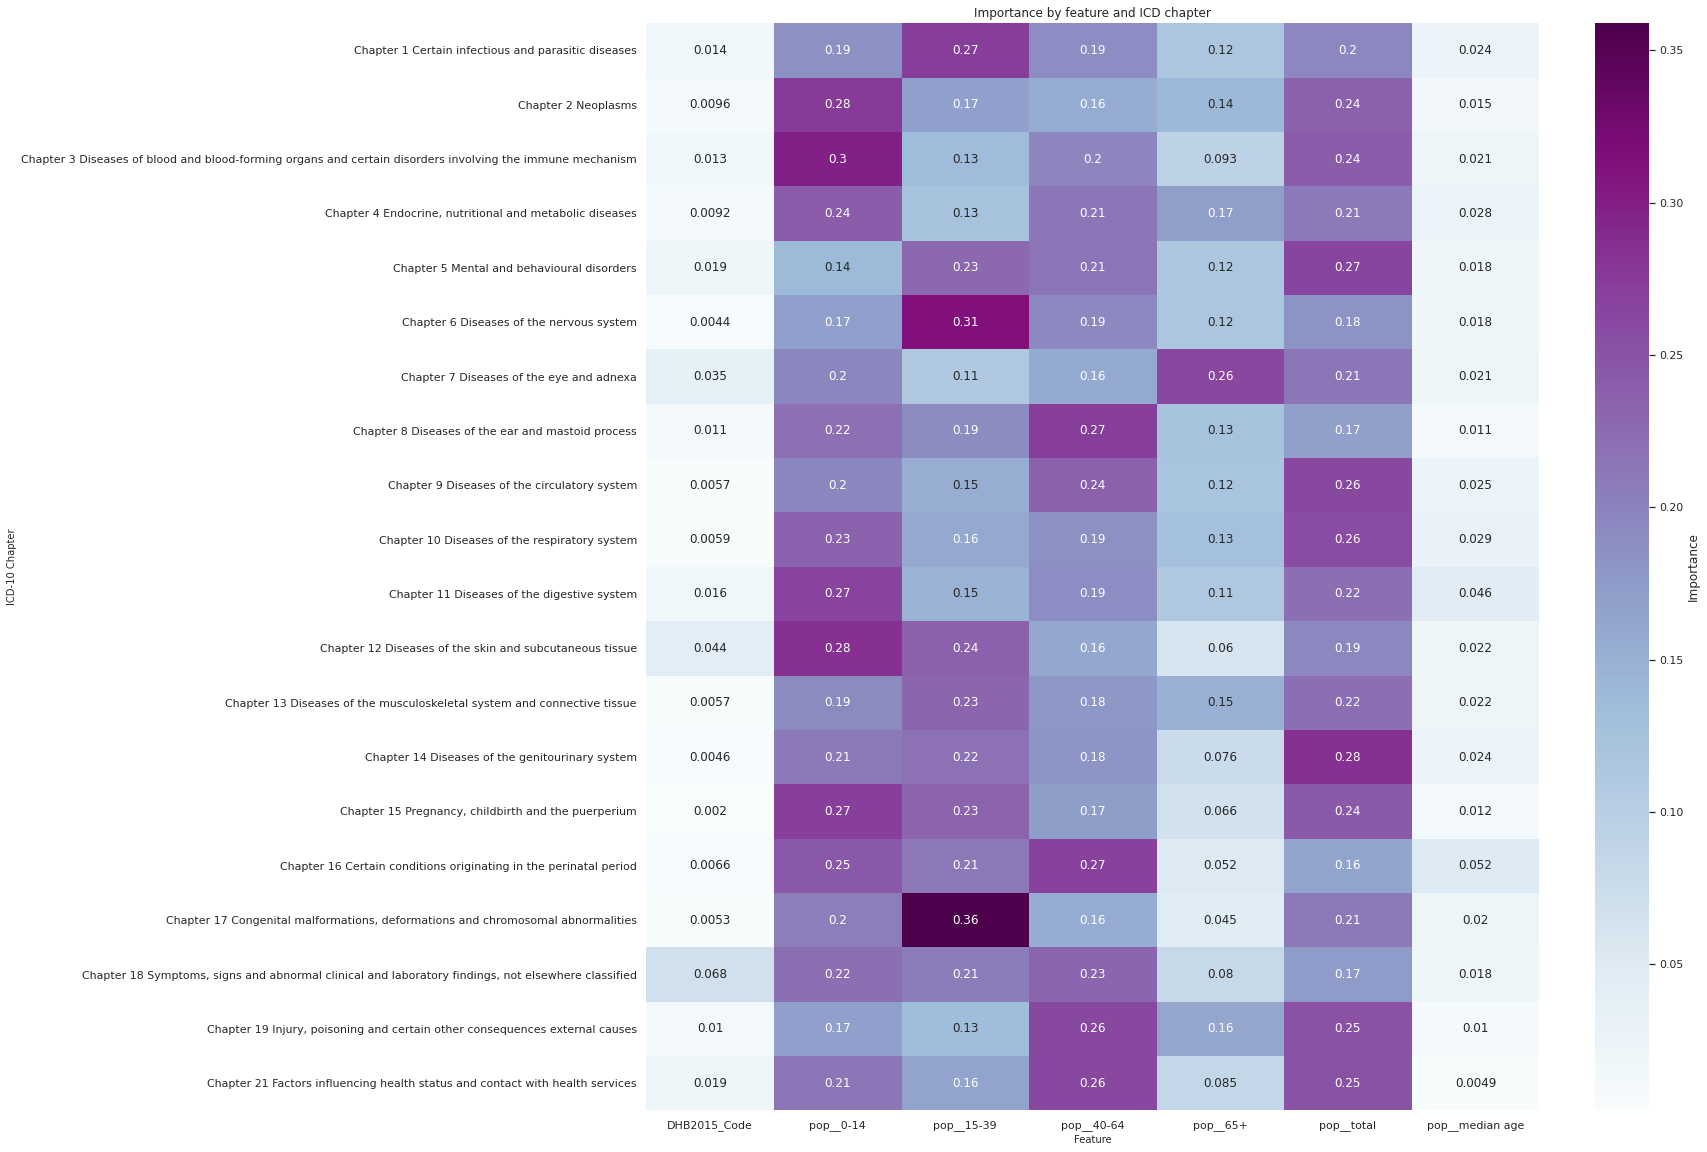

In [ ]:
# Print ExtraTreesRegressor feature importance by chapter. MultiOutputRegressor required for this.
model = MultiOutputRegressor(sklearn.ensemble.ExtraTreesRegressor())
model.fit(x_train, y_train)
print(f"{model}  score: {model.score(x_test, y_test)}")

importances = []
for c, m in zip(target_chapters, model.estimators_):
    imp = {k: v for k, v in zip(x_train.columns, m.feature_importances_)}
    imp["Chapter"] = c
    importances.append(imp)
importances = pd.DataFrame(importances).set_index("Chapter")
seaborn.heatmap(importances,
                cmap="BuPu",
                annot=True,
                #fmt="g",
                cbar_kws={'label': 'Importance'})
plt.xlabel('Feature', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("Importance by feature and ICD chapter")

In [ ]:
# ExtraTreesRegressor has the best score
model = sklearn.ensemble.ExtraTreesRegressor()
model.fit(x_test, y_test) # Train on 2018
print(f"{model} score: {model.score(x_train, y_train)}") # Predict 2013
print(f"Feature importances:")
display({k: v for k, v in zip(x_train.columns, model.feature_importances_)})

model.fit(x_train, y_train) # Train on 2013
print(f"{model} score: {model.score(x_test, y_test)}") # Predict 2018
print(f"Feature importances:")
{k: v for k, v in zip(x_train.columns, model.feature_importances_)}

ExtraTreesRegressor() score: 0.8773985306838108
Feature importances:


{'DHB2015_Code': 0.011824967947950947,
 'pop__0-14': 0.21721508686247812,
 'pop__15-39': 0.19776997922166994,
 'pop__40-64': 0.2376973510556669,
 'pop__65+': 0.08876733246284359,
 'pop__total': 0.24184713672949038,
 'pop__median age': 0.0048781457199002475}

ExtraTreesRegressor() score: 0.8521423631955647
Feature importances:


{'DHB2015_Code': 0.01284017001767342,
 'pop__0-14': 0.24038763721353631,
 'pop__15-39': 0.2187562446721435,
 'pop__40-64': 0.23491047943793594,
 'pop__65+': 0.06811436447193371,
 'pop__total': 0.20771317700698883,
 'pop__median age': 0.0172779271797884}

In [ ]:
pred = pd.DataFrame(model.predict(x_test))
pred.columns = target_chapters
pred.index = DHB.DHB2015_Name
pred

,Chapter 1 Certain infectious and parasitic diseases,Chapter 2 Neoplasms,Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"Chapter 4 Endocrine, nutritional and metabolic diseases",Chapter 5 Mental and behavioural disorders,Chapter 6 Diseases of the nervous system,Chapter 7 Diseases of the eye and adnexa,Chapter 8 Diseases of the ear and mastoid process,Chapter 9 Diseases of the circulatory system,Chapter 10 Diseases of the respiratory system,Chapter 11 Diseases of the digestive system,Chapter 12 Diseases of the skin and subcutaneous tissue,Chapter 13 Diseases of the musculoskeletal system and connective tissue,Chapter 14 Diseases of the genitourinary system,"Chapter 15 Pregnancy, childbirth and the puerperium",Chapter 16 Certain conditions originating in the perinatal period,"Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","Chapter 19 Injury, poisoning and certain other consequences external causes",Chapter 21 Factors influencing health status and contact with health services
DHB2015_Name,,,,,,,,,,,,,,,,,,,,
Northland,1324.12,3675.40,555.52,1135.89,1394.49,1057.69,1603.51,408.11,3860.23,3322.64,4586.33,1203.70,2174.75,2202.29,3491.82,726.72,309.26,4228.53,4695.51,4233.58
Waitemata,4510.60,8372.02,1798.42,2686.68,2800.36,3184.16,2559.48,1401.98,9771.02,8708.26,11684.92,3364.74,7610.56,7292.20,11945.38,1856.30,1200.36,18037.78,16068.66,16231.54
Auckland,3526.00,6288.71,1260.54,2305.85,2497.86,2625.15,2491.34,1191.52,7121.04,7167.61,8258.92,2768.65,5729.86,5699.94,10554.02,1552.46,911.86,11224.32,12959.02,15581.59
Counties Manukau,4292.05,7926.67,1702.71,2858.82,2569.41,3077.86,2553.27,1353.52,8971.14,9044.46,10903.84,3509.07,7041.71,6994.25,12488.21,2114.65,1215.05,15492.78,14925.71,16703.44
Waikato,2866.05,7324.84,1376.04,2246.78,2455.79,2889.28,2262.81,1040.03,7053.63,7166.75,8756.98,2259.46,5385.31,4871.19,9719.28,1496.74,800.37,10548.67,11415.44,16847.15
Lakes,835.22,2235.38,534.26,628.49,670.08,714.64,594.51,290.14,2336.57,1992.07,2772.53,673.81,1797.02,1382.09,2533.95,489.31,217.85,3634.29,2943.10,3466.81
Bay of Plenty,1927.61,3919.72,767.63,1323.48,1831.81,1753.97,1465.45,598.31,4744.51,4284.68,5505.59,1404.57,3695.23,3124.97,5130.13,838.48,508.59,6583.84,6821.69,6366.96
Tairawhiti,380.63,957.50,136.85,337.68,295.61,323.90,305.33,108.96,1031.03,977.81,1142.04,313.40,666.76,615.61,948.21,155.39,103.23,1040.46,1318.44,1505.46
Taranaki,792.86,2682.91,490.16,641.31,677.16,722.60,550.40,258.35,2438.03,1841.22,2797.32,618.49,1820.29,1448.62,2473.44,401.72,202.80,3848.52,2971.56,3865.92


Text(0.5, 1.0, 'Discharges by DHB and ICD chapter in 2018')

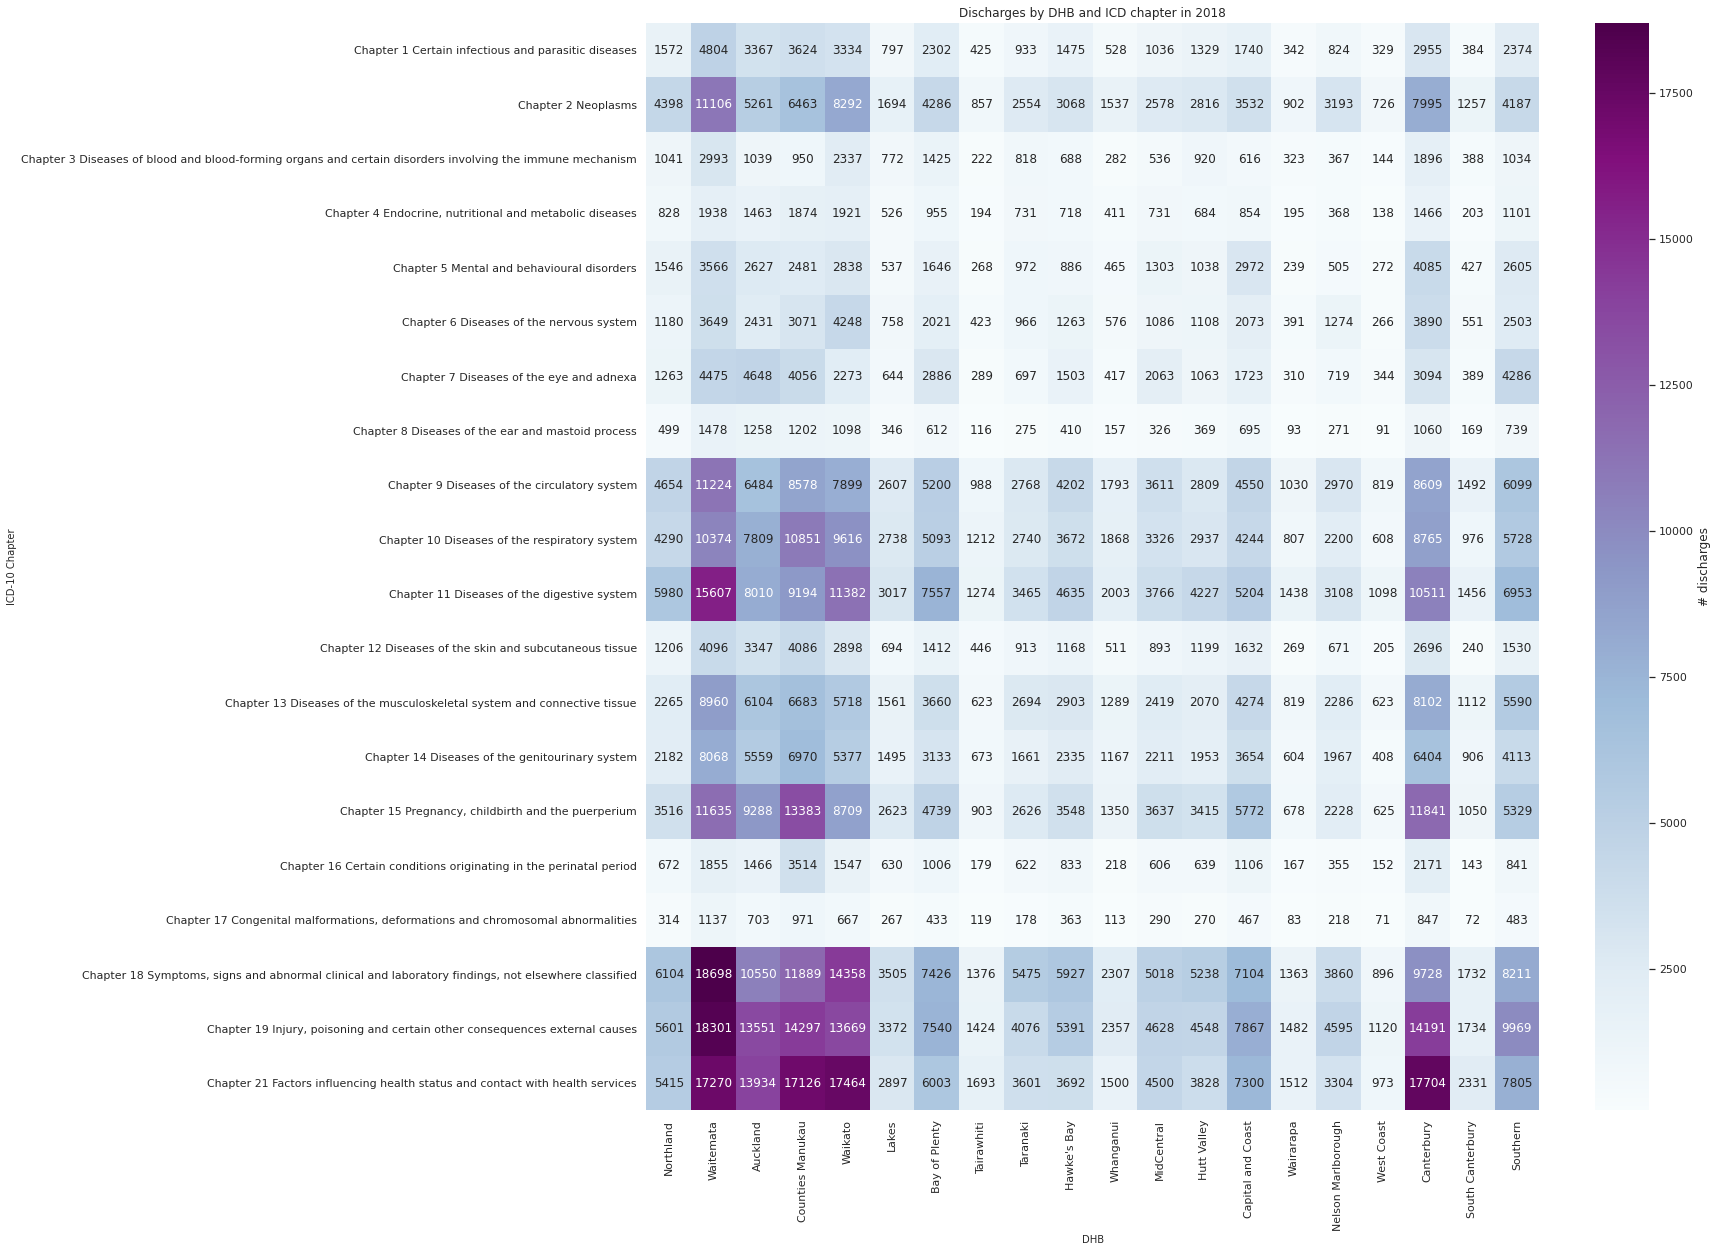

In [ ]:
seaborn.heatmap(y_test.T,
                cmap="BuPu",
                annot=True,
                fmt="g",
                cbar_kws={'label': '# discharges'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("Discharges by DHB and ICD chapter in 2018")

Text(0.5, 1.0, 'ExtraTreesRegressor model error')

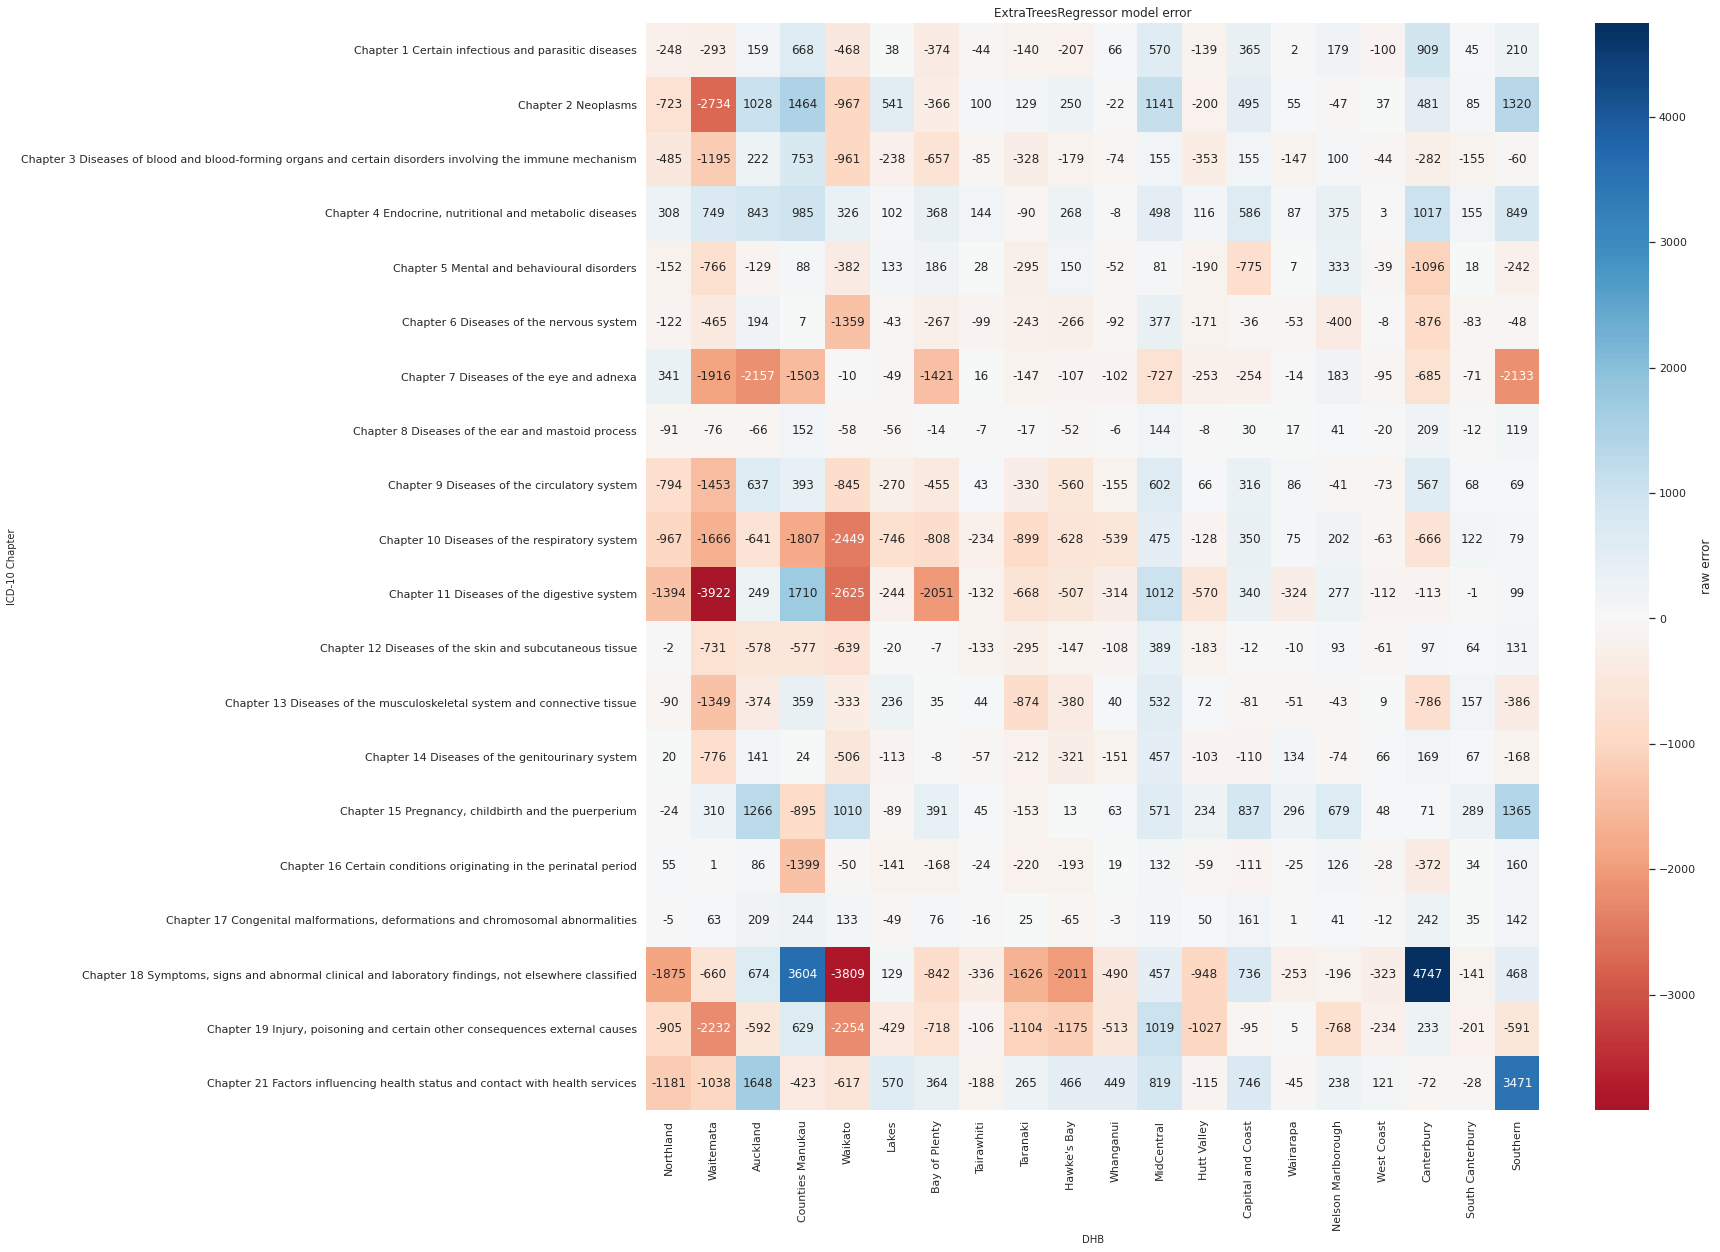

In [ ]:
err = pred - y_test
seaborn.heatmap(err.T,
                center=0,
                cmap="RdBu",
                annot=True,
                fmt=".0f",
                cbar_kws={'label': 'raw error'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("ExtraTreesRegressor model error")

Text(0.5, 1.0, 'ExtraTreesRegressor model error')

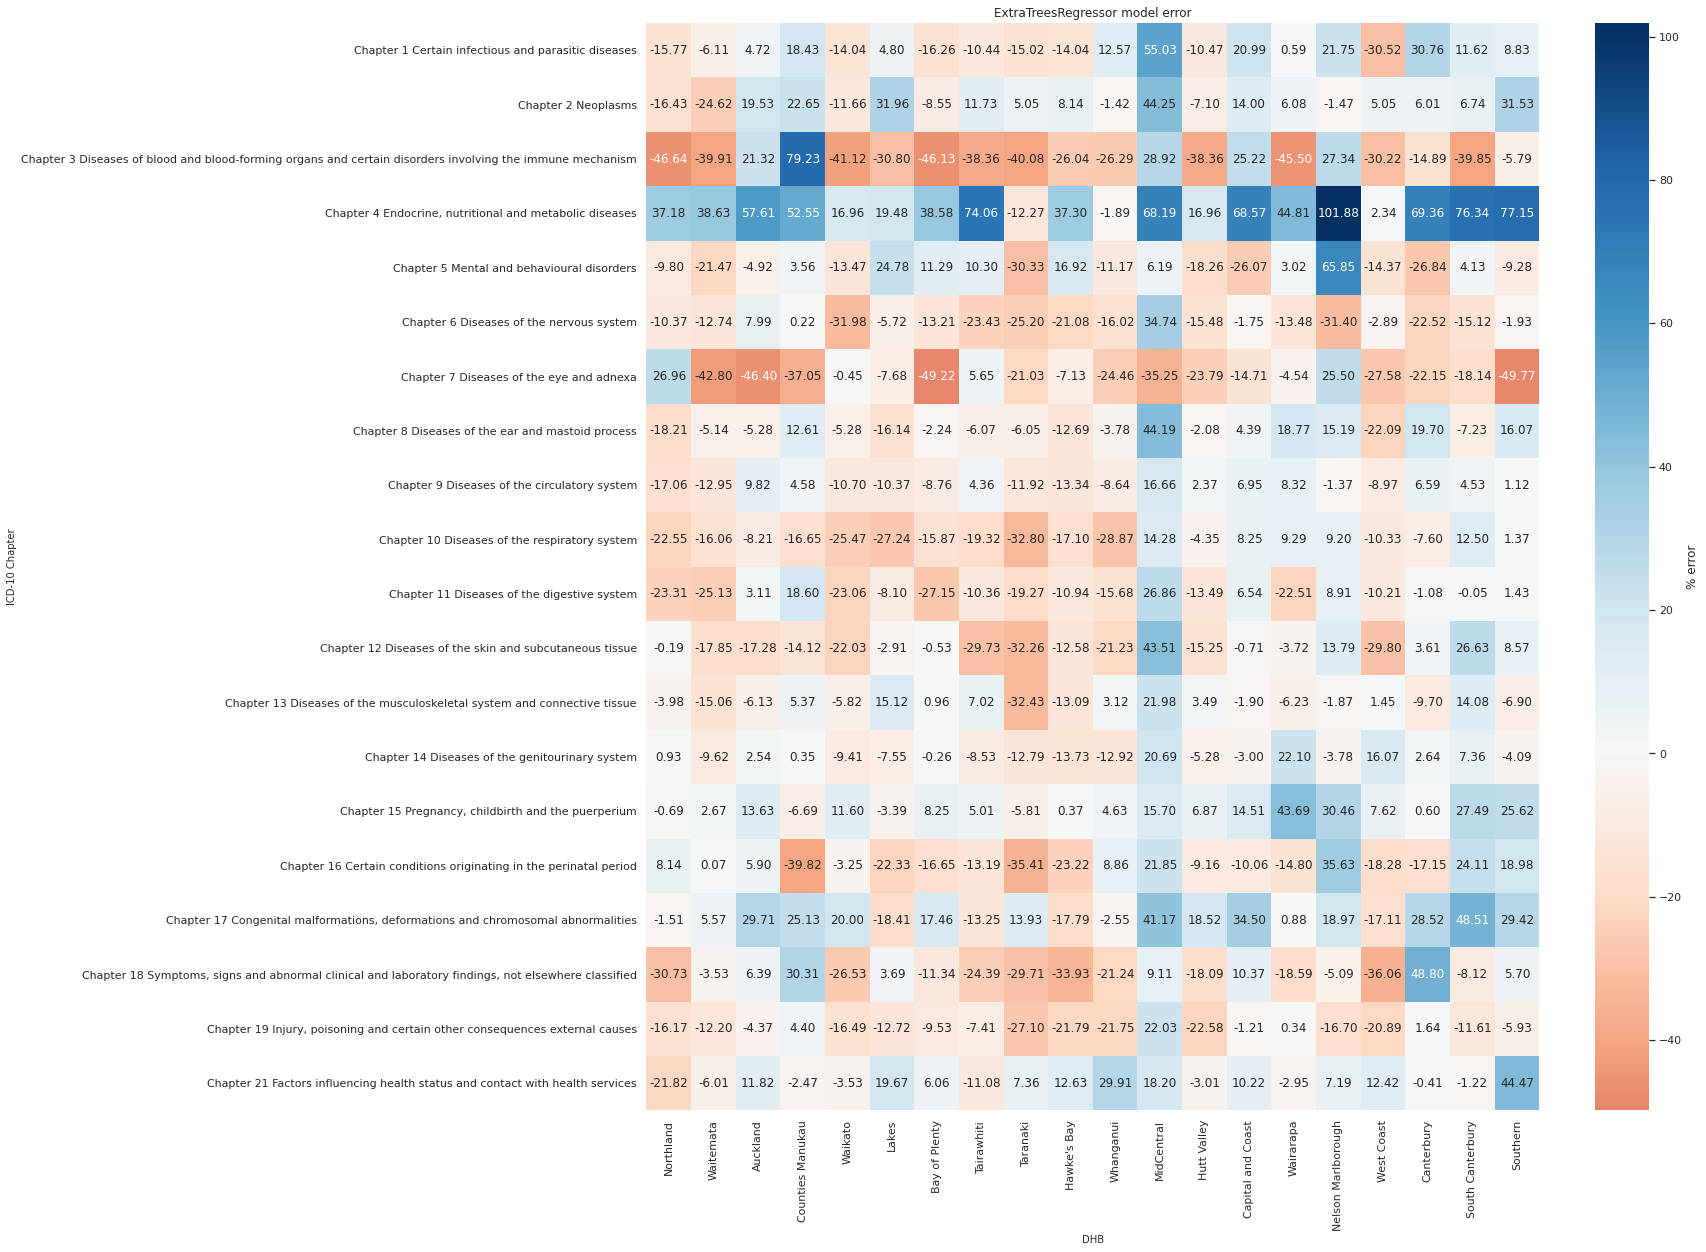

In [ ]:
pct_err = ((pred - y_test) / y_test) * 100
seaborn.heatmap(pct_err.T,
                cmap="RdBu",
                center=0,
                annot=True,
                fmt=".2f",
                cbar_kws={'label': '% error'})
plt.xlabel('DHB', fontsize=10)
plt.ylabel('ICD-10 Chapter', fontsize=10)
plt.title("ExtraTreesRegressor model error")

In [ ]:
# Now fit the model on both 2013 and 2018 data, to predict the future
x_train2 = pd.concat([x_train, x_test])
y_train2 = pd.concat((y_train, y_test))
print(x_train2.shape, y_train2.shape)

model = sklearn.ensemble.ExtraTreesRegressor()
model.fit(x_train2, y_train2)
{k: v for k, v in zip(x_train.columns, model.feature_importances_)}

(40, 7) (40, 20)


{'DHB2015_Code': 0.022056466776737865,
 'pop__0-14': 0.3075069378455923,
 'pop__15-39': 0.13887447284807952,
 'pop__40-64': 0.2020683898334806,
 'pop__65+': 0.05472751318016386,
 'pop__total': 0.2572373807112611,
 'pop__median age': 0.017528838804684737}

In [ ]:
future_years = ['2023', '2028', '2033', '2038', '2043', '2048']
for year in future_years:
    x_test, _ = get_data_for_year(year)
    pred = pd.DataFrame(model.predict(x_test))
    pred.columns = [f"predicted_discharges_{year}_{k}" for k in target_chapters]
    DHB = pd.concat([DHB, pred], axis=1)

In [ ]:
cols = [k for k in DHB.columns if "discharges" in k.lower()]
DHB[["DHB2015_Name"] + cols].sort_values(by=f"predicted_discharges_2048_{target_chapters[0]}", ascending=False)

,DHB2015_Name,discharges_2013_Chapter 1 Certain infectious and parasitic diseases,discharges_2013_Chapter 2 Neoplasms,discharges_2013_Chapter 3 Diseases of blood and blood-forming organs and certain disorders involving the immune mechanism,"discharges_2013_Chapter 4 Endocrine, nutritional and metabolic diseases",discharges_2013_Chapter 5 Mental and behavioural disorders,discharges_2013_Chapter 6 Diseases of the nervous system,discharges_2013_Chapter 7 Diseases of the eye and adnexa,discharges_2013_Chapter 8 Diseases of the ear and mastoid process,discharges_2013_Chapter 9 Diseases of the circulatory system,...,predicted_discharges_2048_Chapter 11 Diseases of the digestive system,predicted_discharges_2048_Chapter 12 Diseases of the skin and subcutaneous tissue,predicted_discharges_2048_Chapter 13 Diseases of the musculoskeletal system and connective tissue,predicted_discharges_2048_Chapter 14 Diseases of the genitourinary system,"predicted_discharges_2048_Chapter 15 Pregnancy, childbirth and the puerperium",predicted_discharges_2048_Chapter 16 Certain conditions originating in the perinatal period,"predicted_discharges_2048_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","predicted_discharges_2048_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","predicted_discharges_2048_Chapter 19 Injury, poisoning and certain other consequences external causes",predicted_discharges_2048_Chapter 21 Factors influencing health status and contact with health services
1,Waitemata,4589,8449,1825,2649,2845,3212,2569,1419,9970,...,13911.13,3727.38,8329.77,7469.20,11373.22,1846.83,1056.58,16906.54,17001.51,17129.69
3,Counties Manukau,4063,7369,1614,3240,2160,2974,2559,1300,7884,...,12783.87,4016.63,7976.67,7521.22,12272.23,2507.68,1051.62,15558.81,16481.22,17199.78
2,Auckland,3520,4967,1047,2243,2284,2354,2614,1198,6093,...,11518.67,3237.59,7117.19,6394.52,10449.28,1702.14,886.22,14032.74,14951.32,16765.21
4,Waikato,2627,7088,1421,2170,2141,3025,2214,975,6557,...,11467.18,3058.93,6800.11,6145.42,10341.69,1776.79,850.08,14062.21,14459.44,17544.63
17,Canterbury,2773,8920,1340,2169,3353,2772,2133,1044,8365,...,11103.21,2892.55,7858.55,6490.62,11562.65,1987.26,901.56,11640.05,14554.20,17829.00
19,Southern,2450,4707,770,1819,2378,2227,2081,762,5858,...,7640.67,1743.13,5565.78,4326.80,7194.06,1129.68,612.57,8901.12,10224.67,11736.30
6,Bay of Plenty,1828,4103,894,1226,1399,1530,1476,498,4793,...,6890.17,1489.39,4656.46,3587.10,5424.47,958.93,506.19,7757.64,8445.29,7652.34
13,Capital and Coast,1863,3393,658,1195,2185,1857,1173,659,4324,...,5831.88,1487.68,4451.96,3546.98,5407.74,943.40,479.54,7253.05,8025.48,7332.19
0,Northland,1323,3746,541,1149,1499,1014,1723,420,3902,...,5955.20,1259.94,2697.72,2506.26,3939.80,754.28,359.84,6145.76,5975.57,5590.31
11,MidCentral,1136,3234,511,1083,943,1127,1063,322,3309,...,5094.31,1179.27,3090.25,2694.04,4331.85,785.21,375.82,5950.08,5944.37,5531.39


In [ ]:
DHB

,DHB2015_Code,DHB2015_Name,Shape_Length,geometry,TALBs,pop_1996_0-14,pop_1996_15-39,pop_1996_40-64,pop_1996_65+,pop_1996_total,...,predicted_discharges_2048_Chapter 11 Diseases of the digestive system,predicted_discharges_2048_Chapter 12 Diseases of the skin and subcutaneous tissue,predicted_discharges_2048_Chapter 13 Diseases of the musculoskeletal system and connective tissue,predicted_discharges_2048_Chapter 14 Diseases of the genitourinary system,"predicted_discharges_2048_Chapter 15 Pregnancy, childbirth and the puerperium",predicted_discharges_2048_Chapter 16 Certain conditions originating in the perinatal period,"predicted_discharges_2048_Chapter 17 Congenital malformations, deformations and chromosomal abnormalities","predicted_discharges_2048_Chapter 18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified","predicted_discharges_2048_Chapter 19 Injury, poisoning and certain other consequences external causes",predicted_discharges_2048_Chapter 21 Factors influencing health status and contact with health services
0,01,Northland,1.651929e+06,"MULTIPOLYGON (((1714357.617 5983211.997, 17143...","Far North District,Whangarei District,Kaipara ...",37200.0,46700.0,39900.0,17000.0,140700.0,...,5955.20,1259.94,2697.72,2506.26,3939.80,754.28,359.84,6145.76,5975.57,5590.31
1,02,Waitemata,9.273920e+05,"MULTIPOLYGON (((1733681.085 5898435.008, 17336...","Rodney Local Board Area,Hibiscus and Bays Loca...",86100.0,147700.0,108000.0,40200.0,381900.0,...,13911.13,3727.38,8329.77,7469.20,11373.22,1846.83,1056.58,16906.54,17001.51,17129.69
2,03,Auckland,7.781903e+05,"MULTIPOLYGON (((1792135.131 5911180.464, 17921...","Aotea/Great Barrier Local Board Area,Waiheke L...",75660.0,162610.0,97060.0,42170.0,377310.0,...,11518.67,3237.59,7117.19,6394.52,10449.28,1702.14,886.22,14032.74,14951.32,16765.21
3,04,Counties Manukau,6.642233e+05,"MULTIPOLYGON (((1770832.380 5917413.866, 17708...","Howick Local Board Area,Māngere-Ōtāhuhu Local ...",94000.0,141200.0,91500.0,30000.0,356600.0,...,12783.87,4016.63,7976.67,7521.22,12272.23,2507.68,1051.62,15558.81,16481.22,17199.78
4,05,Waikato,1.498296e+06,"MULTIPOLYGON (((1857357.606 5876615.882, 18573...","Thames-Coromandel District,Hauraki District,Wa...",85230.0,130160.0,89260.0,36440.0,341210.0,...,11467.18,3058.93,6800.11,6145.42,10341.69,1776.79,850.08,14062.21,14459.44,17544.63
5,06,Lakes,6.236689e+05,"MULTIPOLYGON (((1888813.981 5796074.319, 18889...","Taupo District,Rotorua District",26000.0,37000.0,25500.0,9900.0,98200.0,...,3181.97,769.28,2104.98,1611.32,2597.68,535.88,217.79,4224.35,3600.53,3403.41
6,07,Bay of Plenty,9.468737e+05,"MULTIPOLYGON (((1881976.181 5830239.392, 18819...","Western Bay of Plenty District,Tauranga City,W...",41070.0,56360.0,46700.0,23420.0,167440.0,...,6890.17,1489.39,4656.46,3587.10,5424.47,958.93,506.19,7757.64,8445.29,7652.34
7,08,Tairawhiti,6.895486e+05,"MULTIPOLYGON (((2039187.000 5703721.815, 20391...",Gisborne District,13100.0,16700.0,12100.0,5200.0,47200.0,...,1418.86,365.23,934.61,794.93,1023.48,176.95,101.48,1506.24,1548.02,1806.02
8,09,Taranaki,5.657958e+05,"MULTIPOLYGON (((1687624.521 5675968.386, 16876...","New Plymouth District,Stratford District,South...",26830.0,38940.0,29510.0,13970.0,109250.0,...,3254.28,768.59,2329.98,1676.34,2568.58,503.83,201.44,4534.19,3796.35,3625.54
9,10,Hawke's Bay,9.454397e+05,"MULTIPOLYGON (((1941251.295 5580353.810, 19412...","Wairoa District,Hastings District,Napier City,...",36000.0,51400.0,40550.0,18500.0,146550.0,...,4773.37,1172.34,2717.51,2358.65,3639.68,755.30,351.02,5578.60,5314.94,4323.44


In [ ]:
DHB.drop(columns="geometry").to_csv("output/DHBs.csv", index=False)